# Imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.optim import Adam

!pip install tslearn
import numpy as np
from sklearn.metrics import accuracy_score
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler, TimeSeriesScalerMinMax

from typing import List
import matplotlib.pyplot as plt
import seaborn as sns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 369.8/369.8 kB 4.4 MB/s eta 0:00:00


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Read Data

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Profesional/SmartData Tech Task/example_raw_data.csv", on_bad_lines='skip', delimiter=";", index_col=0)

<ipython-input-5-4aa754659321>:1: DtypeWarning: Columns (3,11,22,23,25,26,30,31,32,36,37,38,39,40,41,42,44,46,50,51,56,58,59,60,61,62,63,64,67,68,69,80) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Profesional/SmartData Tech Task/example_raw_data.csv", on_bad_lines='skip', delimiter=";", index_col=0)


In [ ]:
df.head(100)

,Datum (Anlage),Zeit (Anlage),Ereignis,Error Number,Wind Speed (avg),Wind Speed (max),Wind Speed (min),Rotor Speed [rpm] (avg),Rotor Speed [rpm] (max),Rotor Speed [rpm] (min),...,Feature 73,Feature 74,Feature 75,Feature 76,Feature 77,Feature 78,Feature 79,Feature 80,Feature 81,Feature 82
0,01.01.18,00:00:00,NaN,NaN,"10,47",NaN,NaN,"12,00",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01.01.18,00:10:00,NaN,NaN,"11,20",NaN,NaN,"11,99",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01.01.18,00:20:00,NaN,NaN,"11,45",NaN,NaN,"11,99",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01.01.18,00:30:00,NaN,NaN,"10,99",NaN,NaN,"11,98",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01.01.18,00:40:00,NaN,NaN,"9,81",NaN,NaN,"12,03",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,01.01.18,15:50:00,NaN,NaN,"6,01",NaN,NaN,"10,04",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,01.01.18,16:00:00,NaN,NaN,"6,29",NaN,NaN,"10,43",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,01.01.18,16:10:00,NaN,NaN,"6,83",NaN,NaN,"11,13",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,01.01.18,16:20:00,NaN,NaN,"7,93",NaN,NaN,"12,29",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367494 entries, 0 to 52416
Data columns (total 99 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Datum (Anlage)               367494 non-null  object 
 1   Zeit (Anlage)                367494 non-null  object 
 2   Ereignis                     4517 non-null    object 
 3   Error Number                 0 non-null       float64
 4   Wind Speed (avg)             365672 non-null  object 
 5   Wind Speed (max)             0 non-null       float64
 6   Wind Speed (min)             0 non-null       float64
 7   Rotor Speed [rpm] (avg)      365672 non-null  object 
 8   Rotor Speed [rpm] (max)      0 non-null       float64
 9   Rotor Speed [rpm] (min)      0 non-null       float64
 10  Active Power (avg)           365672 non-null  object 
 11  Active Power (max)           0 non-null       float64
 12  Active Power (min)           0 non-null       float64
 13  

In [ ]:
df.columns

Index(['Datum (Anlage)', 'Zeit (Anlage)', 'Ereignis', 'Error Number',
       'Wind Speed (avg)', 'Wind Speed (max)', 'Wind Speed (min)',
       'Rotor Speed [rpm] (avg)', 'Rotor Speed [rpm] (max)',
       'Rotor Speed [rpm] (min)', 'Active Power (avg)', 'Active Power (max)',
       'Active Power (min)', 'Nacelle Position (avg)', 'Wind Direction (avg)',
       'Generator Speed [rpm] (avg)', 'Feature 0', 'Feature 1', 'Feature 2',
       'Feature 3', 'Feature 4', 'Feature 5', 'Feature 6', 'Feature 7',
       'Feature 8', 'Feature 9', 'Feature 10', 'Feature 11',
       'Reactive Power (avg)', 'Feature 13', 'Feature 14', 'Feature 15',
       'Feature 16', 'Feature 17', 'Feature 18', 'Feature 19', 'Feature 20',
       'Feature 21', 'Feature 22', 'Feature 23', 'Feature 24', 'Feature 25',
       'Feature 26', 'Feature 27', 'Feature 28', 'Feature 29', 'Feature 30',
       'Feature 31', 'Feature 32', 'Feature 33', 'Feature 34', 'Feature 35',
       'Feature 36', 'Feature 37', 'Feature 38', 'Feat

# Data Exploration

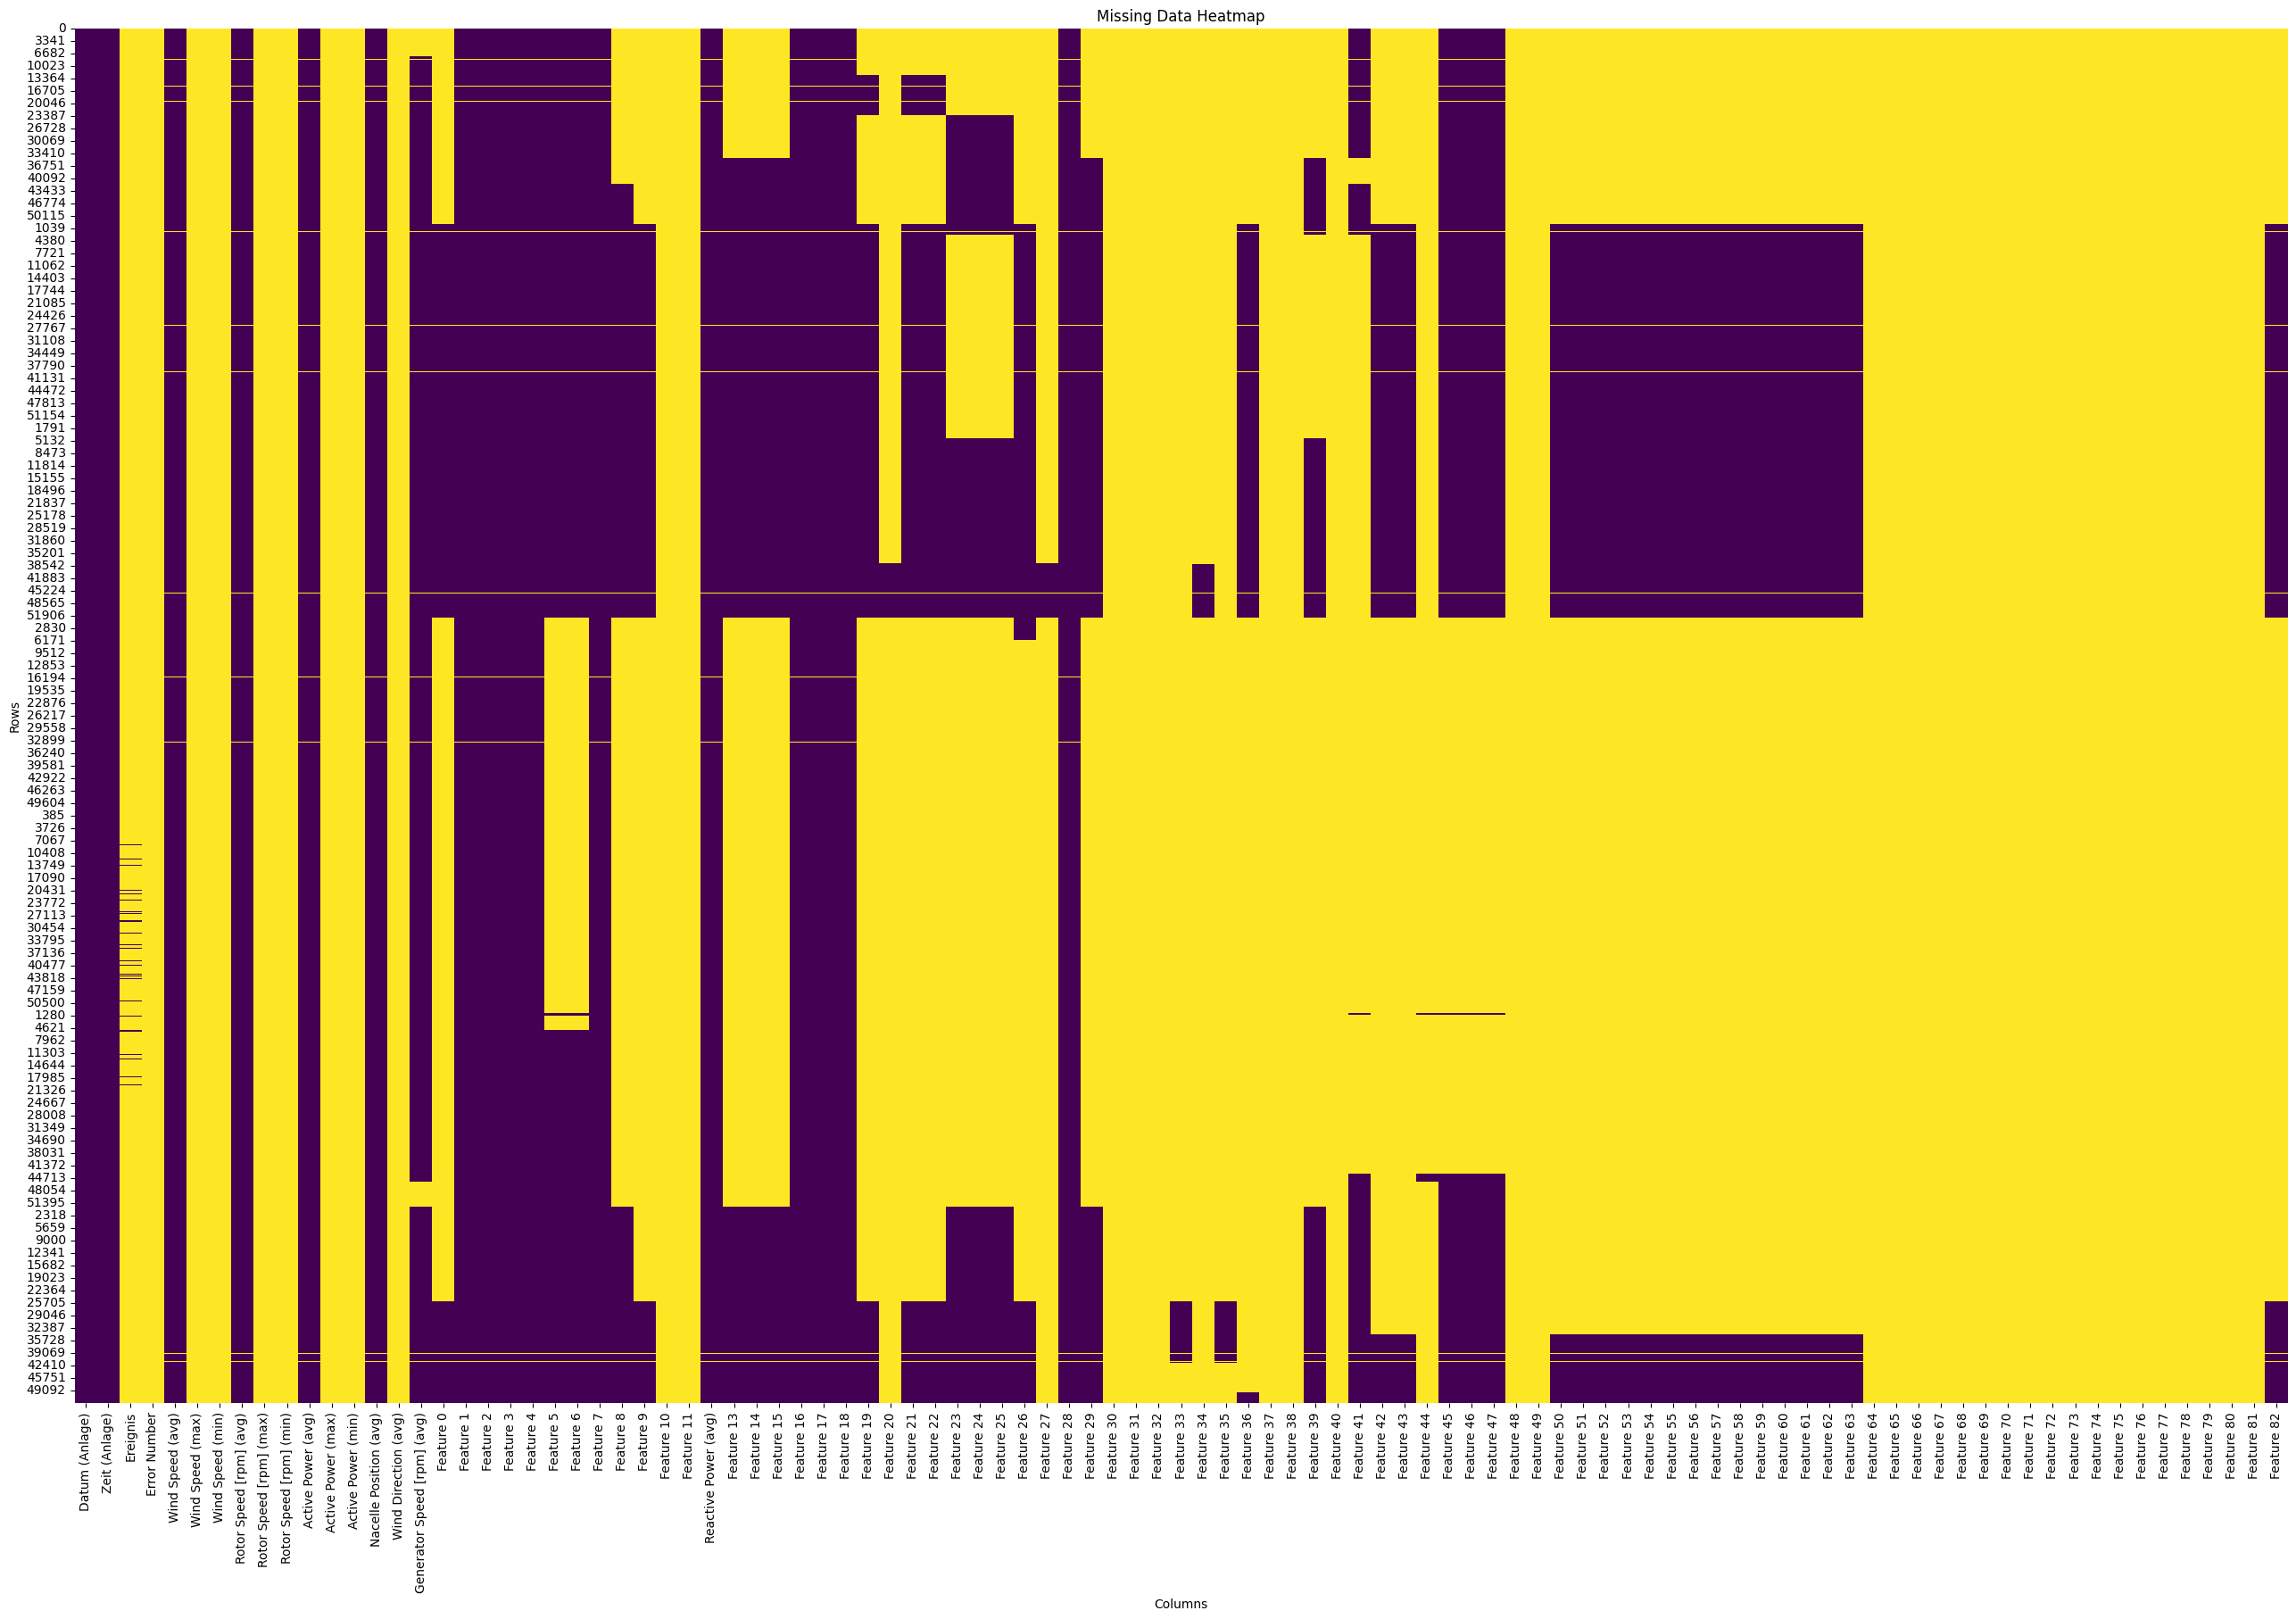

In [ ]:
plt.figure(figsize=(32, 20))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

Observam ca multe coloane au/nu au data simultan in aceeasi perioada de timp

# Preprocessing

In [ ]:
import pandas as pd

# Define a function to remove non-numeric characters (except ".") from a string
def remove_non_numeric(text):
    new_value =  ''.join(filter(lambda x: x.isdigit() or x == '.', text))

    return new_value if new_value is not '' else np.nan

def remove_non_characters(s):
    # Using a generator expression and join to filter out non-character elements
    return ''.join(char for char in s if char.isalpha() or (char == " " or char.isdigit()))




hour = 60*60
minute = 60
day = 60*60*24
year = 365.2425*day

def add_time_column(df):
    df['Seconds'] = df.index.map(pd.Timestamp.timestamp)

    df['Day sin'] = np.sin(df['Seconds'] * (2* np.pi / day))
    df['Day cos'] = np.cos(df['Seconds'] * (2 * np.pi / day))
    df['Year sin'] = np.sin(df['Seconds'] * (2 * np.pi / year))
    df['Year cos'] = np.cos(df['Seconds'] * (2 * np.pi / year))
    df['hour sin'] = np.sin(df['Seconds'] * (2* np.pi / hour))
    df['hour cos'] = np.cos(df['Seconds'] * (2 * np.pi / hour))
    df['minute sin'] = np.sin(df['Seconds'] * (2 * np.pi / minute))
    df['minute cos'] = np.cos(df['Seconds'] * (2 * np.pi / minute))
    df = df.drop('Seconds', axis=1)

    return df

def preprocess_inputs(df):
    # Make a copy of the input DataFrame
    df = df.copy()

    # Combine 'Datum (Anlage)' and 'Zeit (Anlage)' columns into a single 'DateTime' column and drop the original columns
    df['DateTime'] = pd.to_datetime(df['Datum (Anlage)'] + ' ' + df['Zeit (Anlage)'], format='%d.%m.%y %H:%M:%S')
    df.drop(columns=['Datum (Anlage)', 'Zeit (Anlage)'], inplace=True)

    # Reducing dimention for the Dataset
    df = df[::3]

    df.set_index('DateTime', inplace=True)

    # Define a list of columns with missing data exceeding 25%
    missing_values_columns = ['Ereignis', 'Error Number', 'Wind Speed (max)', 'Wind Speed (min)',
       'Rotor Speed [rpm] (max)', 'Rotor Speed [rpm] (min)',
       'Active Power (max)', 'Active Power (min)', 'Wind Direction (avg)',
       'Feature 0', 'Feature 5', 'Feature 6', 'Feature 8', 'Feature 9',
       'Feature 10', 'Feature 11', 'Feature 13', 'Feature 14', 'Feature 15',
       'Feature 19', 'Feature 20', 'Feature 21', 'Feature 22', 'Feature 23',
       'Feature 24', 'Feature 25', 'Feature 26', 'Feature 27', 'Feature 29',
       'Feature 30', 'Feature 31', 'Feature 32', 'Feature 33', 'Feature 34',
       'Feature 35', 'Feature 36', 'Feature 37', 'Feature 38', 'Feature 39',
       'Feature 40', 'Feature 41', 'Feature 42', 'Feature 43', 'Feature 44',
       'Feature 45', 'Feature 46', 'Feature 47', 'Feature 48', 'Feature 49',
       'Feature 50', 'Feature 51', 'Feature 52', 'Feature 53', 'Feature 54',
       'Feature 55', 'Feature 56', 'Feature 57', 'Feature 58', 'Feature 59',
       'Feature 60', 'Feature 61', 'Feature 62', 'Feature 63', 'Feature 64',
       'Feature 65', 'Feature 66', 'Feature 67', 'Feature 68', 'Feature 69',
       'Feature 70', 'Feature 71', 'Feature 72', 'Feature 73', 'Feature 74',
       'Feature 75', 'Feature 76', 'Feature 77', 'Feature 78', 'Feature 79',
       'Feature 80', 'Feature 81', 'Feature 82']

    # Drop columns with missing data exceeding 25%
    df = df.drop(missing_values_columns, axis=1)

    # Replace commas with dots in all columns
    df = df.applymap(lambda x: x.replace(',', '.') if isinstance(x, str) else x)

    # Remove non-numeric characters from all columns
    df = df.applymap(lambda x: remove_non_numeric(x) if isinstance(x, str) else x)

    # Convert all columns (except the last one) to float
    df.iloc[:, :] = df.iloc[:, :].astype(float)

    # Drop columns with high correlation
    df.drop(columns=["Generator Speed [rpm] (avg)",
                     "Feature 16", "Feature 17",
                    "Feature 2", "Feature 18", "Feature 4",
                     "Reactive Power (avg)",
                    ], axis=1, inplace=True)

    # Drop rows with missing data in the 'Wind Speed (avg)' column
    df.dropna(subset=["Wind Speed (avg)"], inplace=True)

    # Forward-fill missing data
    df.fillna(method="ffill", inplace=True)

    df = df.sort_values(by='DateTime', ascending=True)

    df = add_time_column(df)

    df.columns = [remove_non_characters(i) for i in df.columns]

    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaled_df =  pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    scaled_df.index = df.index

    return scaled_df, scaler


<>:7: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:7: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-10-8707f9cf497a>:7: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  return new_value if new_value is not '' else np.nan


# Exploring pre-processed data

In [ ]:
X, scaler = preprocess_inputs(df)

<ipython-input-10-8707f9cf497a>:79: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, :] = df.iloc[:, :].astype(float)


In [ ]:
X

,Wind Speed avg,Rotor Speed rpm avg,Active Power avg,Nacelle Position avg,Feature 1,Feature 3,Feature 7,Feature 28,Day sin,Day cos,Year sin,Year cos,hour sin,hour cos,minute sin,minute cos
DateTime,,,,,,,,,,,,,,,,
2015-01-01 00:10:00,-0.745832,-1.000000,-0.982045,0.333333,-0.988372,-0.845650,-0.771202,0.995210,0.043619,0.999048,0.001625,0.999999,1.0,0.5,0.536039,-1.0
2015-01-01 00:40:00,-0.726565,-1.000000,-0.983607,0.444444,-0.975637,-0.847470,-0.781180,0.996008,0.173648,0.984808,0.001983,0.999998,-1.0,-0.5,0.546018,-1.0
2015-01-01 01:10:00,-0.726565,-1.000000,-0.984387,0.377778,-0.985050,-0.849290,-0.783244,0.994411,0.300706,0.953717,0.002341,0.999997,1.0,0.5,0.555997,-1.0
2015-01-01 01:40:00,-0.719155,-1.000000,-0.983607,0.450000,-0.976190,-0.851292,-0.769826,0.995210,0.422618,0.906308,0.002700,0.999996,-1.0,-0.5,0.565976,-1.0
2015-01-01 02:10:00,-0.733235,-1.000000,-0.983607,0.544444,-0.965670,-0.853112,-0.793566,0.995210,0.537300,0.843391,0.003058,0.999995,1.0,0.5,0.575956,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30 21:50:00,-0.327158,0.992019,0.841530,0.683333,-0.531008,0.464325,-0.156374,0.997206,-0.537300,0.843391,-0.012046,0.999927,-1.0,0.5,-0.721595,-1.0
2021-12-30 22:20:00,-0.379770,0.915403,0.595628,0.694444,-0.531561,0.283764,-0.159126,0.995609,-0.422618,0.906308,-0.011688,0.999932,1.0,-0.5,-0.711616,-1.0
2021-12-30 22:50:00,-0.376806,0.912211,0.583919,0.677778,-0.533223,0.273207,-0.170824,0.996008,-0.300706,0.953717,-0.011330,0.999936,-1.0,0.5,-0.701637,-1.0


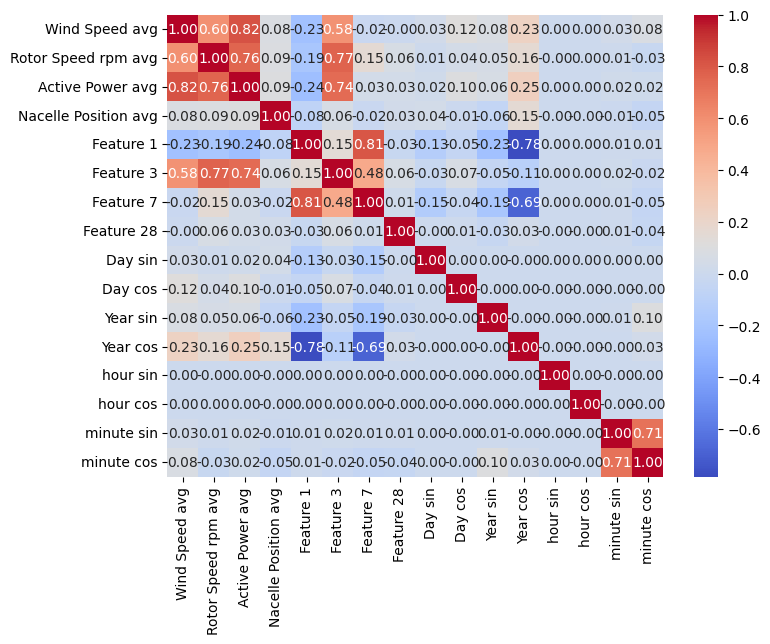

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121898 entries, 2015-01-01 00:10:00 to 2021-12-30 23:50:00
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Wind Speed avg        121898 non-null  float64
 1   Rotor Speed rpm avg   121898 non-null  float64
 2   Active Power avg      121898 non-null  float64
 3   Nacelle Position avg  121898 non-null  float64
 4   Feature 1             121898 non-null  float64
 5   Feature 3             121898 non-null  float64
 6   Feature 7             121898 non-null  float64
 7   Feature 28            121898 non-null  float64
 8   Day sin               121898 non-null  float64
 9   Day cos               121898 non-null  float64
 10  Year sin              121898 non-null  float64
 11  Year cos              121898 non-null  float64
 12  hour sin              121898 non-null  float64
 13  hour cos              121898 non-null  float64
 14  minute sin        

/usr/local/lib/python3.10/dist-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


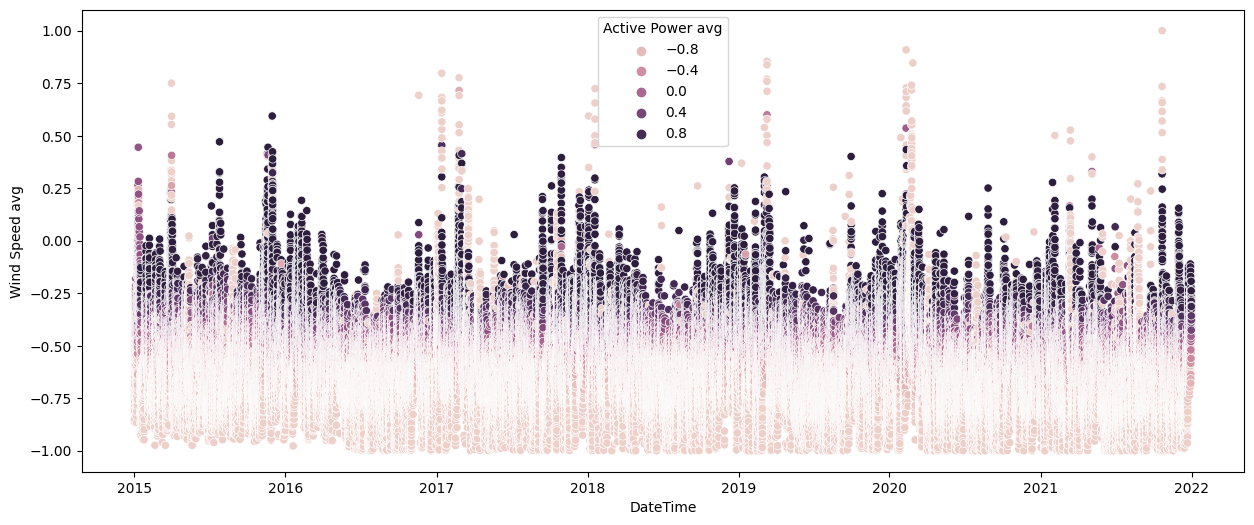

In [ ]:
plt.figure(figsize=(15, 6))
sns.scatterplot(data=X, x='DateTime', y='Wind Speed avg', hue="Active Power avg", cmap='gist_rainbow')
plt.show()

# Use LSTM model

## Prepare data for LSTM model

In [ ]:


def preprocess_data(df):
    # Extract day, month, hour, and minute from DateTime
    df = df.copy()

    df['Day'] = df['DateTime'].dt.day
    df['Month'] = df['DateTime'].dt.month
    df['Hour'] = df['DateTime'].dt.hour
    df['Minute'] = df['DateTime'].dt.minute

    # Drop the DateTime column (since its information has been extracted)
    df = df.drop("DateTime", axis=1)

    # Separate the target column
    target_column = df["Active Power (avg)"].values
    df = df.drop("Active Power (avg)", axis=1)

    # Normalize the features
    scaler = MinMaxScaler()
    df_normalized = scaler.fit_transform(df)
    df_normalized = pd.DataFrame(df_normalized, columns=df.columns)

    # Convert data to LSTM input format
    X, y = [], []
    window_size = 60  # this can be adjusted
    for i in range(len(df_normalized) - window_size):
        X.append(df_normalized.iloc[i:i + window_size].values)
        y.append(target_column[i + window_size])

    X, y = np.array(X), np.array(y)

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    return X_train, X_test, y_train, y_test, scaler


## Setup ModelCheckpoint and EarlyStopping:

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Specify where you want to save the model
file_path = "/content/drive/MyDrive/Profesional/SmartData Tech Task/models/LSTM/my_model.keras"

# Save the model after every epoch
checkpoint = ModelCheckpoint(file_path, monitor='val_loss', verbose=1, save_best_only=False, mode='min', save_weights_only=False)

# Stop training when a monitored quantity has stopped improving
early = EarlyStopping(monitor="val_loss", mode="min", patience=5)

callbacks_list = [checkpoint, early]

## Define Model

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import load_model



## Train Model

In [ ]:
import os
from keras.initializers import he_normal
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.layers import BatchNormalization


In [ ]:
import gc
gc.collect()

In [ ]:
X.info()

In [ ]:
# Load the data
X_train, X_test, y_train, y_test, scaler = preprocess_data(X)

gc.collect()

model = Sequential()
model.add(LSTM(50, activation='tanh', kernel_initializer='glorot_uniform', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(LSTM(50, activation='tanh', kernel_initializer='glorot_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1))

optimizer = Adam(clipvalue=1.0, learning_rate=1e-3)  # adjust learning rate here
model.compile(optimizer=optimizer, loss='mse')

# In the case if the model was trained before - load data
if os.path.isfile(file_path):
    model = load_model(file_path)
    pass
model.fit(X_train, y_train, epochs=50, batch_size=32,
          validation_data=(X_test, y_test), shuffle=False,
          callbacks=callbacks_list)

# Predictions can be obtained using model.predict() and then scaling back using the inverse_transform() method of the scaler.


In [ ]:
model.save_weights(file_path)

In [ ]:
def predict_next_30_days(model, last_sequence, scaler, num_features):
    future_days = 30
    predictions = []

    for _ in range(future_days):
        # Reshape the sequence to be (1, sequence_length, num_features)
        current_sequence = np.array(last_sequence).reshape((1, last_sequence.shape[0], num_features))

        # Make the prediction for the next day
        predicted_value = model.predict(current_sequence)

        # Inverse the scaling
        predicted_value_original_scale = scaler.inverse_transform(np.array([[0] * (num_features-1) + [predicted_value[0][0]]]))[0][-1]

        # Store the predicted value
        predictions.append(predicted_value_original_scale)

        # Create a new sequence for next prediction
        new_row = np.zeros(num_features)
        new_row[-1] = predicted_value
        last_sequence = np.vstack([last_sequence[1:], new_row])

    return predictions


# To use the above function:
last_x_days_data = X_test[-1]  # Get the last window from the test data
num_features = last_x_days_data.shape[1]
predicted_values = predict_next_30_days(model, last_x_days_data, scaler, num_features)

print(predicted_values)


# Use Prophet Model

## Preprocess Data for Prophet

In [ ]:
def prepare_data_prophet(df):
    """Data should be prepared for Prophet model"""

    df = df.copy()

    # Convert 'Datetime' column to 'ds'
    df.rename(columns={'DateTime': 'ds'}, inplace=True)

    # Convert your target column (e.g., 'EnergyProduction') to 'y'
    df.rename(columns={'Active Power (avg)': 'y'}, inplace=True)

    return df

## Model Importing

In [ ]:
!python -m pip install prophet
from prophet import Prophet

## Train Model

In [ ]:
data = prepare_data_prophet(X)

In [ ]:
del X
del df

In [ ]:
model = Prophet()
model.fit(data)

## Making Predictions

In [ ]:
# Create a future dataframe for, e.g., 365 days
future = model.make_future_dataframe(periods=180)

# Make predictions
forecast = model.predict(future)

# Plot the predictions
fig = model.plot(forecast)


In [ ]:
import pickle

with open('/content/drive/MyDrive/Profesional/SmartData Tech Task/prophet_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Use XGboost

In [ ]:
!pip install xgboost

In [ ]:
def preproces_data_xgboost(df):

    df = df.copy()

    df['dayofmonth'] = df['DateTime'].dt.day
    df['quarter'] = df['DateTime'].dt.quarter
    df['month'] = df['DateTime'].dt.month
    df["hour"] = df['DateTime'].dt.hour
    df["minutes"] = df['DateTime'].dt.minute

     # Drop the DateTime column (since its information has been extracted)
    df = df.drop("DateTime", axis=1)

    # Separate the target column
    y = df["Active Power avg"].values
    df = df.drop("Active Power avg", axis=1)

    # Normalize the features
    scaler = MinMaxScaler()
    X = scaler.fit_transform(df)
    X = pd.DataFrame(X, columns=df.columns)

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    return X_train, X_test, y_train, y_test, scaler

In [ ]:
X_train, X_test, y_train, y_test, scaler = preproces_data_xgboost(X)

In [ ]:
X_train.columns

Index(['Wind Speed avg', 'Rotor Speed rpm avg', 'Nacelle Position avg',
       'Feature 1', 'Feature 3', 'Feature 7', 'Feature 28', 'dayofmonth',
       'quarter', 'month', 'hour', 'minutes'],
      dtype='object')

In [ ]:
import xgboost as xgb
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train, verbose = False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

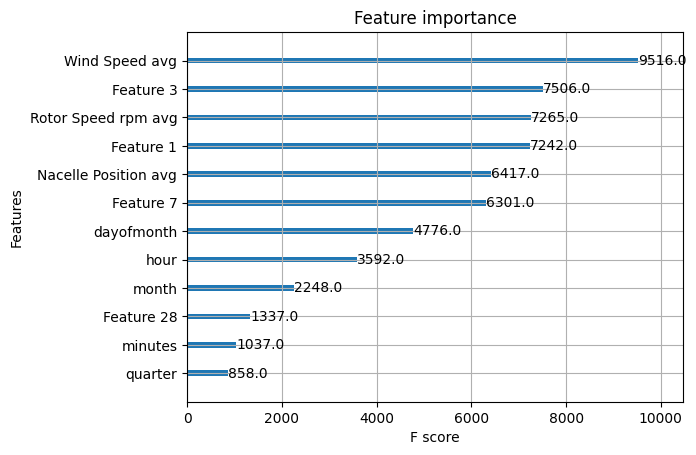

In [ ]:
xgb.plot_importance(reg)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


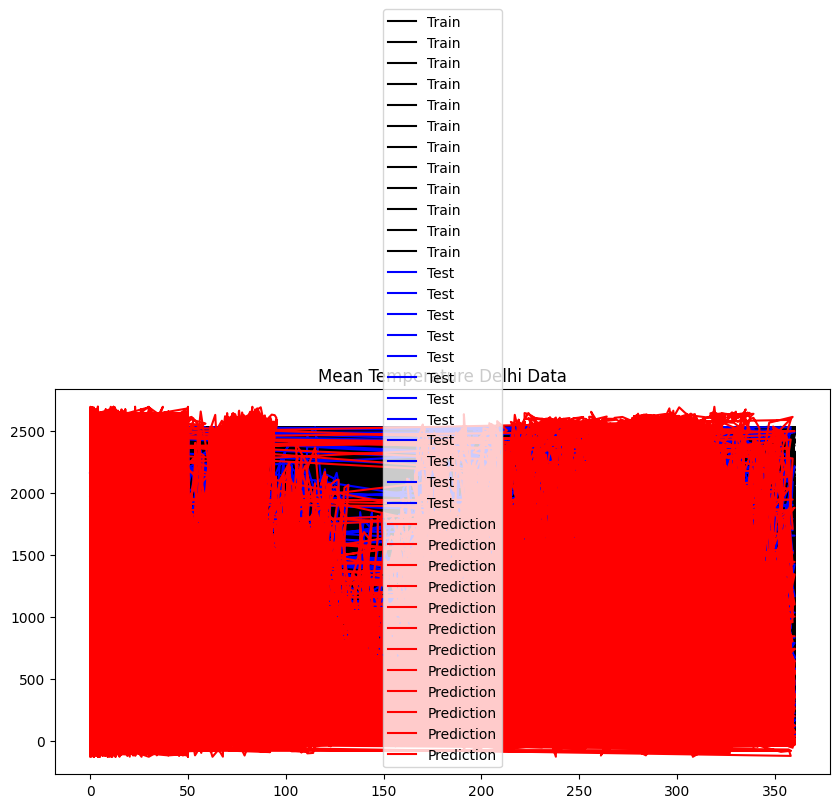

In [ ]:
import matplotlib.pyplot as plt

# Predicting the test set results
y_pred = reg.predict(X_test)

# Scale back the X data
X_train_original = scaler.inverse_transform(X_train)
X_test_original = scaler.inverse_transform(X_test)

# Plotting
plt.figure(figsize=(10,5))
plt.plot(X_train_original, y_train, 'k', label='Train')
plt.plot(X_test_original, y_test, 'b', label='Test')
plt.plot(X_test_original, y_pred, 'r', label='Prediction')
plt.title('Mean Temperature Delhi Data')
plt.legend()
plt.show()


# Using LSTM Multivatiate Time Series

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:



def data_modification(df, window_size=10):
    df = add_time_column(df)

    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][2]
        y.append(label)
    return np.array(X), np.array(y)

In [ ]:
def LSTM_data_preprocess(df):
    df = df.copy()
    X1, y1 = data_modification(df, 24)
    X_train, X_val_test, y_train, y_val_test = train_test_split(X1, y1, test_size=0.3, random_state=42, shuffle=False)

    # Second split to separate out the validation and test sets
    X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42, shuffle=False)

    # scaler = MinMaxScaler()
    # scaler.fit(X_train[:, :, 2])


    # X_train[:, :, 2] = scaler.transform(X_train[:, :, 2])
    # X_val[:, :, 2] = scaler.transform(X_val[:, :, 2])
    # X_test[:, :, 2] = scaler.transform(X_test[:, :, 2])


    return X_train, X_val, X_test, y_train, y_val, y_test

In [ ]:
X_train, X_val, X_test, y_train, y_val, y_test = LSTM_data_preprocess(X)

In [ ]:
X_train.shape

(85311, 24, 16)

In [ ]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions[1:], 'Actuals':y[:-1]})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)

In [ ]:
def predict_next_x_entries(df, window_size=10, future_entries=10):
  df[]


## Another

In [ ]:
model4 = Sequential()
model4.add(InputLayer((10, 21)))
model4.add(LSTM(64, return_sequences=True))
model4.add(Dropout(0.2))
model4.add(LSTM(64))
model4.add(Dropout(0.1))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 10, 64)            22016     
                                                                 
 dropout_12 (Dropout)        (None, 10, 64)            0         
                                                                 
 lstm_22 (LSTM)              (None, 64)                33024     
                                                                 
 dropout_13 (Dropout)        (None, 64)                0         
                                                                 
 dense_20 (Dense)            (None, 8)                 520       
                                                                 
 dense_21 (Dense)            (None, 1)                 9         
                                                                 
Total params: 55569 (217.07 KB)
Trainable params: 555

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
cp4 = ModelCheckpoint('/content/drive/MyDrive/Profesional/SmartData Tech Task/models/LSTM/LSTM multivariate/final_just_LSTM', save_best_only=True)

In [ ]:
model4.compile(loss=MeanSquaredError(), optimizer="adam", metrics=[RootMeanSquaredError()])

In [ ]:
model4.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[cp4, early_stop])

Epoch 1/100
2667/2667 [==============================] - 31s 10ms/step - loss: 495380.6562 - root_mean_squared_error: 703.8328 - val_loss: 130031.6016 - val_root_mean_squared_error: 360.5989
Epoch 2/100
2667/2667 [==============================] - 26s 10ms/step - loss: 118308.4219 - root_mean_squared_error: 343.9599 - val_loss: 96614.6250 - val_root_mean_squared_error: 310.8289
Epoch 3/100
2667/2667 [==============================] - 26s 10ms/step - loss: 110430.1328 - root_mean_squared_error: 332.3103 - val_loss: 91749.8828 - val_root_mean_squared_error: 302.9024
Epoch 4/100
2667/2667 [==============================] - 20s 7ms/step - loss: 108674.2031 - root_mean_squared_error: 329.6577 - val_loss: 95884.0469 - val_root_mean_squared_error: 309.6515
Epoch 5/100
2667/2667 [==============================] - 27s 10ms/step - loss: 109451.2500 - root_mean_squared_error: 330.8342 - val_loss: 91394.4609 - val_root_mean_squared_error: 302.3152
Epoch 6/100
2667/2667 [===========================

In [ ]:
from tensorflow.keras.models import load_model
model4 = load_model('/content/drive/MyDrive/Profesional/SmartData Tech Task/models/LSTM/LSTM multivariate/2LSTM layers')

In [ ]:
import gc
gc.collect()

0

572/572 [==============================] - 2s 3ms/step


(       Predictions  Actuals
 0        17.994310     35.0
 1        17.994310     17.0
 2        17.994307    153.0
 3       251.474747    256.0
 4       191.756638     31.0
 ...            ...      ...
 18278  2267.568604   2374.0
 18279  2189.763184   2331.0
 18280  2153.066406   2016.0
 18281  2139.540283   2001.0
 18282  2271.543945   2382.0
 
 [18283 rows x 2 columns],
 80368.16152201238)

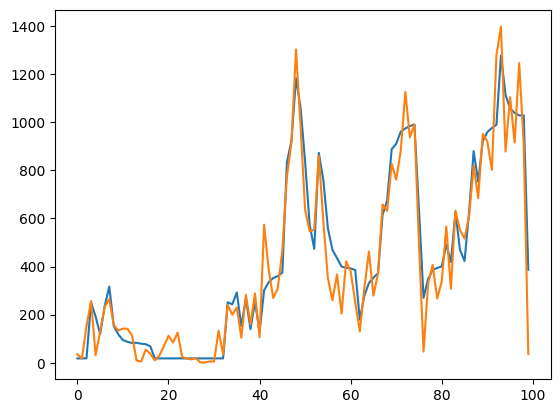

In [ ]:
plot_predictions1(model4, X_test, y_test)

## Another But last

In [ ]:
model_CONVLSTM2 = Sequential()
model_CONVLSTM2.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(24, 16)))  # Smaller kernel
model_CONVLSTM2.add(Conv1D(filters=64, kernel_size=2, activation='relu', padding='same'))  # Added Conv1D Layer
model_CONVLSTM2.add(LSTM(64, return_sequences=True))  # Adjusted LSTM units to 64
model_CONVLSTM2.add(Dropout(0.2))
model_CONVLSTM2.add(Conv1D(filters=48, kernel_size=2, activation='relu', padding='same'))
model_CONVLSTM2.add(MaxPooling1D(pool_size=2))  # Corrected here
model_CONVLSTM2.add(LSTM(48))
model_CONVLSTM2.add(Dropout(0.2))
model_CONVLSTM2.add(Dense(16, activation='relu'))
model_CONVLSTM2.add(Dense(1, activation='linear'))  # Specified activation properly

In [ ]:
cp = ModelCheckpoint('/content/drive/MyDrive/Profesional/SmartData Tech Task/models/LSTM/LSTM multivariate/This is final model_CONVLSTM2', save_best_only=True)

In [ ]:
model_CONVLSTM2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001,), metrics=[RootMeanSquaredError()])

In [ ]:
model_CONVLSTM2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[cp])

Epoch 1/100
2666/2666 [==============================] - 43s 14ms/step - loss: 1021327.1250 - root_mean_squared_error: 1010.6073 - val_loss: 1006354.1875 - val_root_mean_squared_error: 1003.1721
Epoch 2/100
2666/2666 [==============================] - 35s 13ms/step - loss: 830253.3750 - root_mean_squared_error: 911.1824 - val_loss: 784149.3125 - val_root_mean_squared_error: 885.5220
Epoch 3/100
2666/2666 [==============================] - 35s 13ms/step - loss: 614376.1250 - root_mean_squared_error: 783.8215 - val_loss: 562547.3750 - val_root_mean_squared_error: 750.0316
Epoch 4/100
2666/2666 [==============================] - 35s 13ms/step - loss: 421073.5625 - root_mean_squared_error: 648.9018 - val_loss: 375291.8125 - val_root_mean_squared_error: 612.6107
Epoch 5/100
2666/2666 [==============================] - 41s 15ms/step - loss: 273109.0000 - root_mean_squared_error: 522.5983 - val_loss: 237205.3125 - val_root_mean_squared_error: 487.0373
Epoch 6/100
2666/2666 [==================

In [ ]:
plot_predictions1(model_CONVLSTM2, X_test, y_test)

In [ ]:
X.iloc[-10:, :]

,Wind Speed avg,Rotor Speed rpm avg,Active Power avg,Nacelle Position avg,Feature 1,Feature 3,Feature 7,Feature 28,year,month,day,hour,minute
DateTime,,,,,,,,,,,,,
2021-12-30 19:20:00,9.60,12.47,2421.0,305.0,9.03,79.00,24.69,50.01,2021.0,12.0,30.0,19.0,20
2021-12-30 19:50:00,8.71,12.48,2196.0,304.0,8.78,76.55,24.68,50.01,2021.0,12.0,30.0,19.0,50
2021-12-30 20:20:00,9.33,12.47,2337.0,302.0,8.67,76.15,24.37,50.02,2021.0,12.0,30.0,20.0,20
2021-12-30 20:50:00,8.71,12.47,2297.0,308.0,8.69,79.11,24.50,50.00,2021.0,12.0,30.0,20.0,50
2021-12-30 21:20:00,9.26,12.49,2374.0,305.0,8.60,78.11,24.53,49.98,2021.0,12.0,30.0,21.0,20
2021-12-30 21:50:00,9.08,12.48,2331.0,303.0,8.47,80.45,24.52,50.03,2021.0,12.0,30.0,21.0,50
2021-12-30 22:20:00,8.37,12.00,2016.0,305.0,8.46,70.53,24.44,49.99,2021.0,12.0,30.0,22.0,20
2021-12-30 22:50:00,8.41,11.98,2001.0,302.0,8.43,69.95,24.10,50.00,2021.0,12.0,30.0,22.0,50
2021-12-30 23:20:00,9.27,12.03,2382.0,301.0,8.30,74.04,23.89,50.00,2021.0,12.0,30.0,23.0,20


In [ ]:
X_test

array([[[ 2.33000000e+00,  4.35000000e+00,  8.00000000e+00, ...,
         -5.00000000e-01, -8.49155374e-09,  1.00000000e+00],
        [ 2.44000000e+00,  7.86000000e+00,  2.00000000e+00, ...,
          5.00000000e-01, -8.33349375e-09,  1.00000000e+00],
        [ 2.46000000e+00,  7.86000000e+00,  5.00000000e+00, ...,
         -5.00000000e-01, -8.17543376e-09,  1.00000000e+00],
        ...,
        [ 2.41000000e+00,  7.72000000e+00,  8.00000000e+00, ...,
          5.00000000e-01, -7.38513381e-09,  1.00000000e+00],
        [ 3.05000000e+00,  7.86000000e+00,  4.90000000e+01, ...,
         -5.00000000e-01, -7.22707382e-09,  1.00000000e+00],
        [ 3.40000000e+00,  7.86000000e+00,  1.00000000e+02, ...,
          5.00000000e-01, -7.06901384e-09,  1.00000000e+00]],

       [[ 2.44000000e+00,  7.86000000e+00,  2.00000000e+00, ...,
          5.00000000e-01, -8.33349375e-09,  1.00000000e+00],
        [ 2.46000000e+00,  7.86000000e+00,  5.00000000e+00, ...,
         -5.00000000e-01, -8.17543376e

## Another

In [ ]:
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(10, 21)))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='linear'))

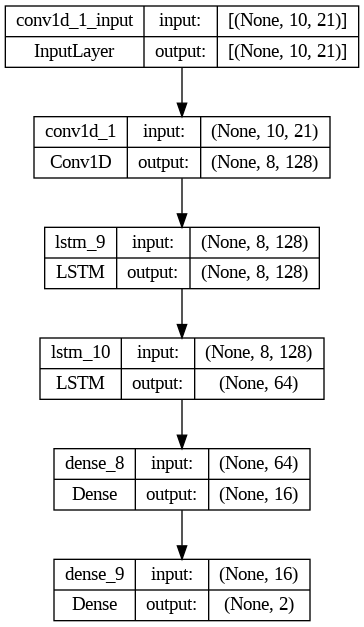

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model5.png', show_shapes=True)

In [ ]:
cp5 = ModelCheckpoint('/content/drive/MyDrive/Profesional/SmartData Tech Task/models/LSTM/LSTM multivariate/CONV1D_LSTM', save_best_only=True)

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6, verbose=1)

In [ ]:
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=100, callbacks=[cp5])

## Another

In [ ]:

model_CONVLSTM2 = Sequential()
model_CONVLSTM2.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(10, 21)))  # Smaller kernel
model_CONVLSTM2.add(Conv1D(filters=64, kernel_size=2, activation='relu', padding='same'))  # Added Conv1D Layer
model_CONVLSTM2.add(LSTM(128, return_sequences=True))
model_CONVLSTM2.add(Dropout(0.2))
model_CONVLSTM2.add(LSTM(64))
model_CONVLSTM2.add(Dropout(0.2))
model_CONVLSTM2.add(Dense(16, activation='relu'))
model_CONVLSTM2.add(Dense(1, activation='linear'))  # Specified activation properly


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
model_CONVLSTM2.compile(loss=MeanSquaredError(), optimizer="adam", metrics=[RootMeanSquaredError()])

In [ ]:
cp6 = ModelCheckpoint('/content/drive/MyDrive/Profesional/SmartData Tech Task/models/LSTM/LSTM multivariate/CONVLSTM2', save_best_only=True)

In [ ]:
model_CONVLSTM2.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=100, callbacks=[cp6, early_stop])

Epoch 1/100
3438/3438 [==============================] - 45s 12ms/step - loss: 319069.2812 - root_mean_squared_error: 564.8622 - val_loss: 90146.8906 - val_root_mean_squared_error: 300.2447
Epoch 2/100
3438/3438 [==============================] - 37s 11ms/step - loss: 105051.3516 - root_mean_squared_error: 324.1163 - val_loss: 88731.4531 - val_root_mean_squared_error: 297.8783
Epoch 3/100
3438/3438 [==============================] - 29s 8ms/step - loss: 106923.2969 - root_mean_squared_error: 326.9913 - val_loss: 95578.5938 - val_root_mean_squared_error: 309.1579
Epoch 4/100
3438/3438 [==============================] - 30s 9ms/step - loss: 105151.4453 - root_mean_squared_error: 324.2706 - val_loss: 92773.3281 - val_root_mean_squared_error: 304.5871
Epoch 5/100
3438/3438 [==============================] - 29s 8ms/step - loss: 104604.4766 - root_mean_squared_error: 323.4261 - val_loss: 90812.6562 - val_root_mean_squared_error: 301.3514
Epoch 6/100
3438/3438 [==============================

In [ ]:
def plot_predictions2(model, X, y, start=0, end=100):
    predictions = model.predict(X).flatten()


    df = pd.DataFrame(data={'Predictions':predictions[1:], 'Actuals':y[:-1]})
    plt.plot(df['Predictions'][start:end])
    plt.plot(df['Actuals'][start:end])
    return df, mse(y, predictions)

216/216 [==============================] - 1s 4ms/step


(      Predictions  Actuals
 0       10.586849     -6.0
 1       10.586847     -6.0
 2       10.586849     -5.0
 3       10.586845     -5.0
 4       10.586849     -6.0
 ...           ...      ...
 6882  2342.211914   2374.0
 6883  2353.510498   2331.0
 6884  2291.245605   2016.0
 6885  2222.902832   2001.0
 6886  2293.625000   2382.0
 
 [6887 rows x 2 columns],
 60768.76662467361)

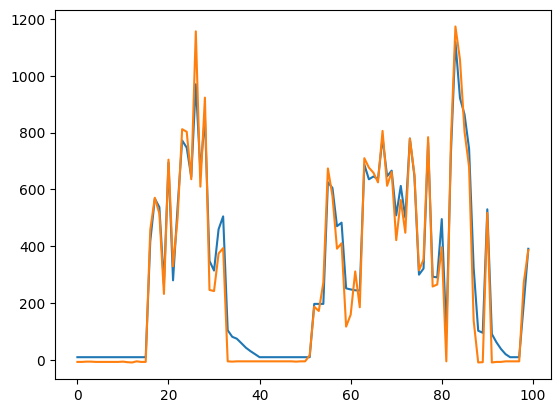

In [ ]:
plot_predictions2(model_CONVLSTM2, X2_test, y2_test)

# Use Seq2seq

In [ ]:
import tensorflow as tf
tf.random.set_seed(0)
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Activation
from tensorflow.keras.utils import plot_model
from tensorflow.keras import optimizers, backend as K
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from datetime import datetime

## First Attempt

In [ ]:
TRAIN_RANGE = (datetime(2015, 1, 1), datetime(2018, 7, 2))
VALID_RANGE = (datetime(2018, 7, 3), datetime(2020, 4, 3, 5, 20))
TEST_RANGE = (datetime(2020, 4, 3, 6, 20), datetime(2021, 12, 30, 23, 50))
ENCODER_TIMESTEPS = 48
DECODER_TIMESTEPS = 24  # Slide 24 (12 hours) when decoder predicts

In [ ]:
def create_dataset(data, enc_timesteps=ENCODER_TIMESTEPS, dec_timesteps=DECODER_TIMESTEPS):
    """Create input and output pairs for training lstm.
    Params:
        data (pandas.DataFrame): Normalized dataset
        enc_timesteps (int, default: ENCODER_TIMESTEPS): Input time length of encoder
        dec_timesteps (int, default: DECODER_TIMESTEPS): Input time length of decoder
    Returns:
        X_encoder (numpy.array): Input for encoder
        X_decoder (numpy.array): Input for decoder
        y (numpy.array): Output for decoder
        y_date (list): Datetime of output
        start_values (list): Start valeus of each input
    """
    X_encoder, X_decoder, y, y_date, start_values = [], [], [], [], []

    for i in range(len(data) - enc_timesteps - dec_timesteps):
        Xt_encoder = data.iloc[i:i+enc_timesteps].values
        Xt_decoder = data.iloc[i+enc_timesteps-dec_timesteps:i+enc_timesteps].values
        yt = data.iloc[i+enc_timesteps:i+enc_timesteps+dec_timesteps].values
        yt_date = data.index[i+enc_timesteps].to_pydatetime()  # Get start date of decoder output

        # Subtract a start value from each values in the timestep.
        start_value = Xt_encoder[0]
        Xt_encoder = Xt_encoder - start_value
        Xt_decoder = Xt_decoder - start_value
        yt = yt - start_value

        X_encoder.append(Xt_encoder)
        X_decoder.append(Xt_decoder)
        y.append(yt)
        y_date.append(yt_date)
        start_values.append(start_value)

    return np.array(X_encoder), np.array(X_decoder), np.array(y), y_date, start_values

In [ ]:
def split_train_valid_test(X_encoder, X_decoder, y, y_date, train_range=TRAIN_RANGE, valid_range=VALID_RANGE, test_range=TEST_RANGE):
    """Split X and y into train, valid, and test periods.
    Params:
        X_encoder (numpy.array): Input for encoder
        X_decoder (numpy.array): Input for decoder
        y (numpy.array): Output for lstm
        y_date (list): Datetime of output
        train_range (tuple): Train period
        valid_range (tuple): Validation period
        test_range (tuple): Test period
    Returns:
        X_encoder_train (pandas.DataFrame), X_decoder_train (pandas.DataFrame)
        X_encoder_valid (pandas.DataFrame), X_decoder_valid (pandas.DataFrame)
        X_encoder_test (pandas.DataFrame), X_decoder_test (pandas.DataFrame)
        y_train (pandas.DataFrame)
        y_valid (pandas.DataFrame)
        y_test (pandas.DataFrame)
        y_date_train (list)
        y_date_valid (list)
        y_date_test (list)
    """
    train_end_idx = y_date.index(train_range[1])
    valid_end_idx = y_date.index(valid_range[1])

    X_encoder_train = X_encoder[:train_end_idx+1, :]
    X_encoder_valid = X_encoder[train_end_idx+1:valid_end_idx+1, :]
    X_encoder_test = X_encoder[valid_end_idx+1:, :]

    X_decoder_train = X_decoder[:train_end_idx+1, :]
    X_decoder_valid = X_decoder[train_end_idx+1:valid_end_idx+1, :]
    X_decoder_test = X_decoder[valid_end_idx+1:, :]

    y_train = y[:train_end_idx+1]
    y_valid = y[train_end_idx+1:valid_end_idx+1]
    y_test = y[valid_end_idx+1:]

    y_date_train = y_date[:train_end_idx+1]
    y_date_valid = y_date[train_end_idx+1:valid_end_idx+1]
    y_date_test = y_date[valid_end_idx+1:]

    return X_encoder_train, X_decoder_train, X_encoder_valid, X_decoder_valid, X_encoder_test, X_decoder_test, \
                y_train, y_valid, y_test, y_date_train, y_date_valid, y_date_test

In [ ]:
X_encoder, X_decoder, y, y_date, start_values = create_dataset(X)

In [ ]:
X_encoder_train, X_decoder_train, X_encoder_valid, X_decoder_valid, X_encoder_test, X_decoder_test, \
    y_train, y_valid, y_test, y_date_train, y_date_valid, y_date_test = split_train_valid_test(X_encoder, X_decoder, y, y_date)

In [ ]:
print(X_encoder_train.shape, X_encoder_valid.shape, X_encoder_test.shape)
print(X_decoder_train.shape, X_decoder_valid.shape, X_decoder_test.shape)
print(y_train.shape, y_valid.shape, y_test.shape)

(60875, 48, 16) (30577, 48, 16) (30374, 48, 16)
(60875, 24, 16) (30577, 24, 16) (30374, 24, 16)
(60875, 24, 16) (30577, 24, 16) (30374, 24, 16)


In [ ]:
import gc
gc.collect()

73

### Create Model

In [ ]:
DECODER_TIMESTEPS

24

In [ ]:
def create_model(enc_timesteps=ENCODER_TIMESTEPS, dec_timesteps=DECODER_TIMESTEPS):
    # Create encoder
    encoder_inputs = Input(shape=(enc_timesteps, 16), name='encoder_input')
    encoder, state_h1, state_c1 = LSTM(128, return_sequences=True, return_state=True, name='encoder_lstm_1')(encoder_inputs)
    encoder_states1 = [state_h1, state_c1]

    encoder_outputs, state_h2, state_c2 = LSTM(32, return_state=True, name='encoder_lstm_2')(encoder)
    encoder_states2 = [state_h2, state_c2]

    # Create decoder
    decoder_inputs = Input(shape=(dec_timesteps, 1), name='decoder_input')
    decoder, _, _ = LSTM(128, return_sequences=True, return_state=True, name='decoder_lstm_1')(decoder_inputs, initial_state=encoder_states1)
    decoder, _, _ = LSTM(32, return_sequences=True, return_state=True, name='decoder_lstm_2')(decoder, initial_state=encoder_states2)


    # Create output layer
    decoder_outputs = Dense(1)(decoder)

    model = Model(inputs=[encoder_inputs, decoder_inputs], outputs=decoder_outputs)
    model.compile(loss='mean_squared_error', optimizer=optimizers.Adam(lr=0.01), metrics=['mean_absolute_error'])
    return model

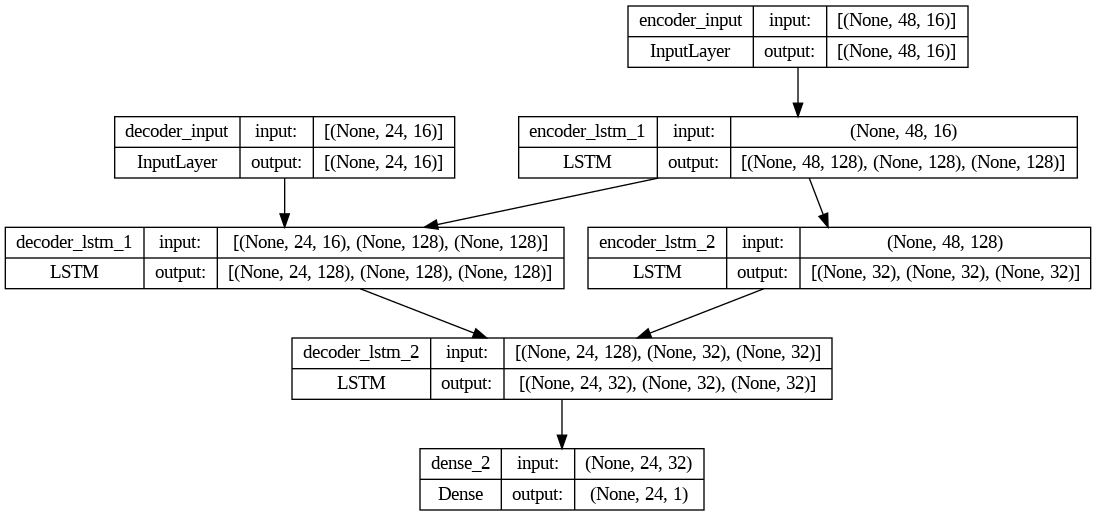

In [ ]:
# Create model
model = create_model()
plot_model(model, show_shapes=True)

In [ ]:
# Callbacks of training.
es = EarlyStopping(monitor='val_mean_absolute_error', min_delta=0, patience=15, verbose=1, mode='auto')
fn = '/content/drive/MyDrive/Profesional/SmartData Tech Task/models/seq2seq/try1/trained_model.h5'
mc = ModelCheckpoint(filepath=fn, save_best_only=True)
callbacks = [es, mc]

In [ ]:
# Start training model.
fit = model.fit(
    [X_encoder_train, X_decoder_train], y_train,
    batch_size=64,
    epochs=1000,
    verbose=2,
    validation_data=([X_encoder_valid, X_decoder_valid], y_valid),
    callbacks=callbacks)

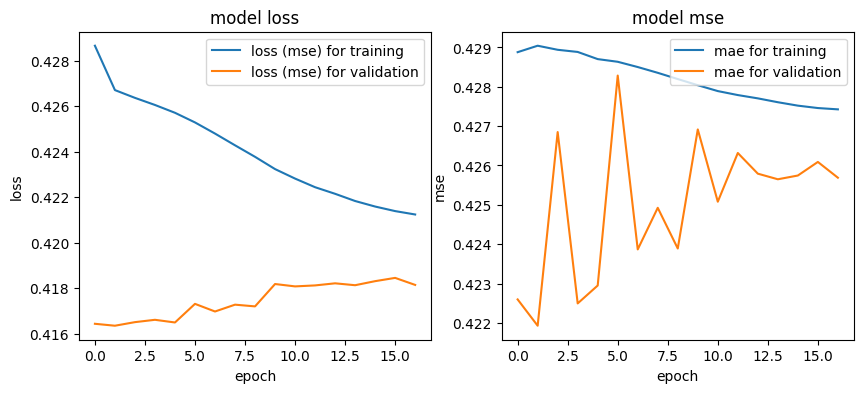

In [ ]:
# Plot training history
fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10, 4))
axL.plot(fit.history['loss'], label="loss (mse) for training")
axL.plot(fit.history['val_loss'], label="loss (mse) for validation")
axL.set_title('model loss')
axL.set_xlabel('epoch')
axL.set_ylabel('loss')
axL.legend(loc='upper right')

axR.plot(fit.history['mean_absolute_error'], label="mae for training")
axR.plot(fit.history['val_mean_absolute_error'], label="mae for validation")
axR.set_title('model mse')
axR.set_xlabel('epoch')
axR.set_ylabel('mse')
axR.legend(loc='upper right')

plt.show()

# Load best model
model = load_model(fn)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
def evaluate_model(data, scaler, X_encoder_train, X_decoder_train, X_encoder_valid, X_decoder_valid, \
                   X_encoder_test, X_decoder_test, y_train, y_valid, y_test, y_date_train, y_date_valid, y_date_test, start_values, model, \
                  pred_timesteps=0):
    """Evaluate trained model by rmse (root mean squared error) and mae (mean absolute error)'
    Params:
        pred_timesteps (int): (t + T + pred_timesteps)th month if predicted from t ~ t + T months
    """

    # Predict next month passengers
    pred_train = model.predict([X_encoder_train, X_decoder_train])[:, pred_timesteps]
    pred_valid = model.predict([X_encoder_valid, X_decoder_valid])[:, pred_timesteps]
    pred_test = model.predict([X_encoder_test, X_decoder_test])[:, pred_timesteps]

    # Add start_values that were subtracted when preprocessing.
    pred_train  = pred_train + start_values[:len(X_encoder_train)]
    pred_valid  = pred_valid + start_values[len(X_encoder_train):len(X_encoder_train)+len(X_encoder_valid)]
    pred_test  = pred_test + start_values[len(X_encoder_train)+len(X_encoder_valid):]

    # Inverse transform normalization
    pred_train = scaler.inverse_transform(pred_train).flatten()
    pred_valid = scaler.inverse_transform(pred_valid).flatten()
    pred_test = scaler.inverse_transform(pred_test).flatten()

    # Plot prediction result
    pred_df = pd.DataFrame({
        'Passengers': data['Passengers'].values,
        'PredictionTrain': np.nan, 'PredictionValid': np.nan, 'PredictionTest': np.nan
    })

    train_start_idx = ENCODER_TIMESTEPS + pred_timesteps
    valid_start_idx = train_start_idx + len(pred_train)
    test_start_idx = valid_start_idx + len(pred_valid)

    pred_df.loc[train_start_idx:valid_start_idx - 1, 'PredictionTrain'] = pred_train
    pred_df.loc[valid_start_idx:test_start_idx-1, 'PredictionValid'] = pred_valid
    pred_df.loc[test_start_idx:test_start_idx+ len(pred_test)-1, 'PredictionTest'] = pred_test

    pred_df.idx =  data.index
    pred_df[['Passengers', 'PredictionTrain', 'PredictionValid', 'PredictionTest']].plot(figsize=(12, 6), title='Predicted monthly airline passengers')

    # Add start_values that were subtracted when preprocessing.
    y_train  = y_train[:, pred_timesteps] + start_values[:len(X_encoder_train)]
    y_valid  = y_valid[:, pred_timesteps] + start_values[len(X_encoder_train):len(X_encoder_train)+len(X_encoder_valid)]
    y_test  = y_test[:, pred_timesteps] + start_values[len(X_encoder_train)+len(X_encoder_valid):]

    # Inverse transform normalization
    y_train = scaler.inverse_transform(y_train).flatten()
    y_valid = scaler.inverse_transform(y_valid).flatten()
    y_test = scaler.inverse_transform(y_test).flatten()

    # Evaluate prediction scores of model.
    for y, pred, mode in zip([y_train, y_valid, y_test], [pred_train, pred_valid, pred_test], ['train', 'valid', 'test']):
        rmse = np.sqrt(mean_squared_error(y, pred))
        mae = mean_absolute_error(y, pred)
        print(f'{mode} rmse: {rmse:.06f}, mae: {mae:.06f}')

In [ ]:
# Predict next month.
evaluate_model(data, scaler, X_encoder_train, X_decoder_train, X_encoder_valid, X_decoder_valid, \
               X_encoder_test, X_decoder_test, y_train, y_valid, y_test, y_date_train, y_date_valid, y_date_test, start_values, model, \
              pred_timesteps=0)

NameError: ignored

In [ ]:
# Predict next 5 months
evaluate_model(data, scaler, X_encoder_train, X_decoder_train, X_encoder_valid, X_decoder_valid, \
               X_encoder_test, X_decoder_test, y_train, y_valid, y_test, y_date_train, y_date_valid, y_date_test, start_values, model, \
              pred_timesteps=DECODER_TIMESTEPS-1)

## Second Attempt

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import Sequence

input_steps = 48
output_steps = 24

# Define a generator to create batches of data
class DataGenerator(Sequence):
    def __init__(self, df, input_steps, output_steps, batch_size):
        self.df = df
        self.input_steps = input_steps
        self.output_steps = output_steps
        self.batch_size = batch_size
        self.indexes = np.arange(len(df) - (input_steps + output_steps) + 1)

    def __len__(self):
        return len(self.indexes) // self.batch_size

    def __getitem__(self, index):
        start = index * self.batch_size
        end = (index + 1) * self.batch_size
        batch_x, batch_y, decoder_input = [], [], []
        for i in range(start, end):
            x = self.df.iloc[i:i+self.input_steps].values
            y = self.df.iloc[i+self.input_steps:i+self.input_steps+self.output_steps]['Active Power avg'].values
            decoder_inp = np.zeros((self.output_steps, 1))
            batch_x.append(x)
            batch_y.append(y)
            decoder_input.append(decoder_inp)
        return [np.array(batch_x), np.array(decoder_input)], np.array(batch_y)


batch_size = 64
train_generator = DataGenerator(X, input_steps, output_steps, batch_size)


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, TimeDistributed, Dropout
from tensorflow.keras.optimizers import Adam

input_features = X.shape[1]

encoder_inputs = Input(shape=(input_steps, input_features))
encoder = LSTM(128, return_state=True, dropout=0.2, recurrent_dropout=0.2)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)
encoder_states = [state_h, state_c]

decoder_inputs = Input(shape=(output_steps, 1))
decoder_lstm = LSTM(128, return_sequences=True, return_state=True, dropout=0.2, recurrent_dropout=0.2)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_dense = Dense(1)
decoder_outputs = TimeDistributed(decoder_dense)(decoder_outputs)

model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.9)

optimizer = Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer, loss='mse')


In [ ]:
checkpoint_filepath = '/content/drive/MyDrive/Profesional/SmartData Tech Task/models/seq2seq/try2/best_model.h5'

In [ ]:
model.load_weights(checkpoint_filepath)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Define Model Checkpoint callback

model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

# Define Learning Rate Reducer callback
lr_reducer = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    verbose=1,
    min_lr=1e-5)

# Define Early Stopping callback
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1)

callbacks = [model_checkpoint_callback, lr_reducer, early_stopping_callback]

In [ ]:
# Define the split point
split_point = int(0.8 * len(X))  # 80% for training and 20% for testing

# Split the dataset
train = X.iloc[:split_point]
test = X.iloc[split_point:]

In [ ]:
# Create Data Generators
train_generator = DataGenerator(train, input_steps, output_steps, batch_size=64)
test_generator = DataGenerator(test, input_steps, output_steps, batch_size=64)

# Train the Model
history = model.fit(train_generator, epochs=50,
                    validation_data=test_generator,
                    steps_per_epoch=len(train_generator),
                    validation_steps=len(test_generator),
                    callbacks=callbacks)

Epoch 1/50
1522/1522 [==============================] - 454s 292ms/step - loss: 0.2272 - val_loss: 0.2103 - lr: 9.8410e-04
Epoch 2/50
1522/1522 [==============================] - 423s 278ms/step - loss: 0.2105 - val_loss: 0.1831 - lr: 9.6845e-04
Epoch 3/50
1522/1522 [==============================] - 412s 270ms/step - loss: 0.2062 - val_loss: 0.1768 - lr: 9.5304e-04
Epoch 4/50
1522/1522 [==============================] - 408s 268ms/step - loss: 0.2020 - val_loss: 0.1890 - lr: 9.3788e-04
Epoch 5/50
1522/1522 [==============================] - 410s 269ms/step - loss: 0.1999 - val_loss: 0.1835 - lr: 9.2296e-04
Epoch 6/50
 580/1522 [==========>...................] - ETA: 4:10 - loss: 0.2000

In [ ]:
predictions = []
y_true = []

for i in range(len(test_generator)):
    X_batch, y_batch = test_generator[i]
    y_pred_batch = model.predict(X_batch)

    predictions.append(y_pred_batch.squeeze())
    y_true.append(y_batch.squeeze())

# Convert to NumPy arrays for easier handling
predictions = np.array(predictions)
y_true = np.array(y_true)


# Inverse Scale the Predictions and True Values
y_pred_original_scale = scaler.inverse_transform(predictions)
y_true_original_scale = scaler.inverse_transform(y_true)


In [ ]:
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.figure(figsize=(10,6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss Across Epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    plt.show()

# Call the function with the history object
plot_loss(history)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plotting the true values
plt.plot(y_true_original_scale, label='True', color='blue')

# Plotting the predicted values
plt.plot(y_pred_original_scale, label='Predicted', color='red', linestyle='dashed')

plt.title('True vs Predicted Values')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend(loc='upper left')
plt.show()


## Third attempt

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import Sequence

input_steps = 24
output_steps = 12

# Define a generator to create batches of data
class DataGenerator(Sequence):
    def __init__(self, df, input_steps, output_steps, batch_size):
        self.df = df
        self.input_steps = input_steps
        self.output_steps = output_steps
        self.batch_size = batch_size
        self.indexes = np.arange(len(df) - (input_steps + output_steps) + 1)

    def __len__(self):
        return len(self.indexes) // self.batch_size

    def __getitem__(self, index):
        start = index * self.batch_size
        end = (index + 1) * self.batch_size
        batch_x, batch_y, decoder_input = [], [], []
        for i in range(start, end):
            x = self.df.iloc[i:i+self.input_steps].values
            y = self.df.iloc[i+self.input_steps:i+self.input_steps+self.output_steps][['Active Power avg']].values
            decoder_inp = np.zeros((self.output_steps, 1))  # assuming you want decoder_input to have the shape (output_steps, 1)
            batch_x.append(x)
            batch_y.append(y)
            decoder_input.append(decoder_inp)
        return [np.array(batch_x), np.array(decoder_input)], np.array(batch_y)



In [ ]:
batch_size = 4096

# Define the split point
split_point = int(0.8 * len(X))  # 80% for training and 20% for testing

# Split the dataset
train = X.iloc[:split_point]
test = X.iloc[split_point:]


# Create Data Generators
train_generator = DataGenerator(train, input_steps, output_steps, batch_size=batch_size)
test_generator = DataGenerator(test, input_steps, output_steps, batch_size=batch_size)

In [ ]:
import tensorflow as tf

In [ ]:
tfk = tf.keras
tfkl = tf.keras.layers

In [ ]:
input_shape = (input_steps, X.shape[1])
output_shape = (output_steps, len(X.columns))

In [ ]:
def build_seq2seq(input_shape=(24, 16), output_shape=(12, 1), n_hidden=16, n_filters=128, kernel_size=2, dropout=0.5, reg_strength=0.0015):
    encoder_inputs = tfkl.Input(shape=input_shape)

    # Smaller kernel size and fewer filters
    conv1d = tfkl.Conv1D(filters=n_filters, kernel_size=kernel_size, activation='relu', padding='same')(encoder_inputs)

    encoder_l1 = tfkl.Bidirectional(tfkl.GRU(n_hidden, return_sequences=True, return_state=True, kernel_regularizer=tf.keras.regularizers.l2(reg_strength)))
    encoder_outputs1, forward_h1, backward_h1 = encoder_l1(conv1d)
    encoder_states1 = [forward_h1, backward_h1]

    # Reduced to one encoder layer for simplicity
    attention = tfkl.Attention(use_scale=True)([encoder_outputs1, encoder_outputs1])
    combined = tfkl.Concatenate(axis=-1)([encoder_outputs1, attention])

    decoder_inputs = tfkl.Input(shape=output_shape)

    decoder_l1 = tfkl.Bidirectional(tfkl.GRU(n_hidden, return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(reg_strength)))
    decoder_outputs1 = decoder_l1(decoder_inputs, initial_state=encoder_states1)

    # Increased dropout rate
    decoder_outputs1 = tfkl.Dropout(dropout)(decoder_outputs1)

    decoder_outputs = tfkl.TimeDistributed(tfkl.Dense(output_shape[1]))(decoder_outputs1)

    model = tfk.Model(inputs=[encoder_inputs, decoder_inputs], outputs=decoder_outputs)
    model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.Adam(), metrics=['mae'])

    return model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model = load_model("/content/drive/MyDrive/Profesional/SmartData Tech Task/models/seq2seq/aiesec/model_4096batch.keras")

ValueError: ignored

In [ ]:
model = build_seq2seq()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 24, 16)]             0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 24, 128)              4224      ['input_1[0][0]']             
                                                                                                  
 input_2 (InputLayer)        [(None, 12, 1)]              0         []                            
                                                                                                  
 bidirectional (Bidirection  [(None, 24, 32),             14016     ['conv1d[0][0]']              
 al)                          (None, 16),                                                     

In [ ]:
model.load_weights(checkpoint_filepath)

In [ ]:
checkpoint_filepath = "/content/drive/MyDrive/Profesional/SmartData Tech Task/models/seq2seq/aiesec/model_4096batch.keras"

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [ ]:

model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

# Define Learning Rate Reducer callback
lr_reducer = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    verbose=1,
    min_lr=1e-5)

# Define Early Stopping callback
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1)

callbacks = [model_checkpoint_callback, lr_reducer, early_stopping_callback]

In [ ]:
history = model.fit(
    x = train_generator,
    #batch_size = batch_size,
    epochs = 50,
    validation_data=test_generator,
    callbacks = callbacks
).history

# model.fit(
#     x = test,
#     #batch_size = batch_size,
#     validation_data = test,
#     epochs = 2
# )

Epoch 1/25
23/23 [==============================] - 147s 4s/step - loss: 0.6340 - mae: 0.5882 - val_loss: 0.4601 - val_mae: 0.4501 - lr: 0.0010
Epoch 2/25
23/23 [==============================] - 84s 4s/step - loss: 0.4687 - mae: 0.4709 - val_loss: 0.3401 - val_mae: 0.3827 - lr: 0.0010
Epoch 3/25
23/23 [==============================] - 84s 4s/step - loss: 0.3593 - mae: 0.3999 - val_loss: 0.2619 - val_mae: 0.3149 - lr: 0.0010
Epoch 4/25
23/23 [==============================] - 91s 4s/step - loss: 0.2917 - mae: 0.3581 - val_loss: 0.2109 - val_mae: 0.2699 - lr: 0.0010
Epoch 5/25
23/23 [==============================] - 85s 4s/step - loss: 0.2483 - mae: 0.3339 - val_loss: 0.1860 - val_mae: 0.2626 - lr: 0.0010
Epoch 6/25
23/23 [==============================] - 86s 4s/step - loss: 0.2232 - mae: 0.3217 - val_loss: 0.1728 - val_mae: 0.2632 - lr: 0.0010
Epoch 7/25
23/23 [==============================] - 84s 4s/step - loss: 0.2094 - mae: 0.3167 - val_loss: 0.1649 - val_mae: 0.2706 - lr: 0.001

In [ ]:
model.load_weights(checkpoint_filepath)

## Predict

In [ ]:
def plot_predictions_with_generator(model, generator,scaler, num_batches=None):
    all_predictions = []
    all_actuals = []

    if num_batches is None:
        num_batches = len(generator)

    for i in range(num_batches):
        (batch_x, decoder_input), batch_y = generator[i]
        predictions = model.predict([batch_x, decoder_input])
        all_predictions.extend(predictions.flatten())
        all_actuals.extend(batch_y.flatten())

    all_predictions = np.array(all_predictions)
    all_actuals = np.array(all_actuals)

    # Create dummy arrays with the same shape as the original data
    dummy_array_pred = np.zeros((len(all_predictions), scaler.scale_.shape[0]))
    dummy_array_actual = np.zeros((len(all_actuals), scaler.scale_.shape[0]))

    # Place the predictions and actuals in the column corresponding to 'Active Power avg'
    active_power_col_index = 2  # Assuming 'Active Power avg' is the 3rd column in the original DataFrame
    dummy_array_pred[:, active_power_col_index] = all_predictions
    dummy_array_actual[:, active_power_col_index] = all_actuals

    # Inverse transform using the original scaler
    all_predictions = scaler.inverse_transform(dummy_array_pred)[:, active_power_col_index]
    all_actuals = scaler.inverse_transform(dummy_array_actual)[:, active_power_col_index]


    df = pd.DataFrame(data={'Predictions': all_predictions, 'Actuals': all_actuals})

    plt.figure(figsize=(20, 8))
    plt.scatter(range(len(df)),df['Predictions'], label='Predictions')
    plt.scatter(range(len(df)),df['Actuals'], label='Actuals')
    plt.legend()
    plt.show()


128/128 [==============================] - 0s 4ms/step


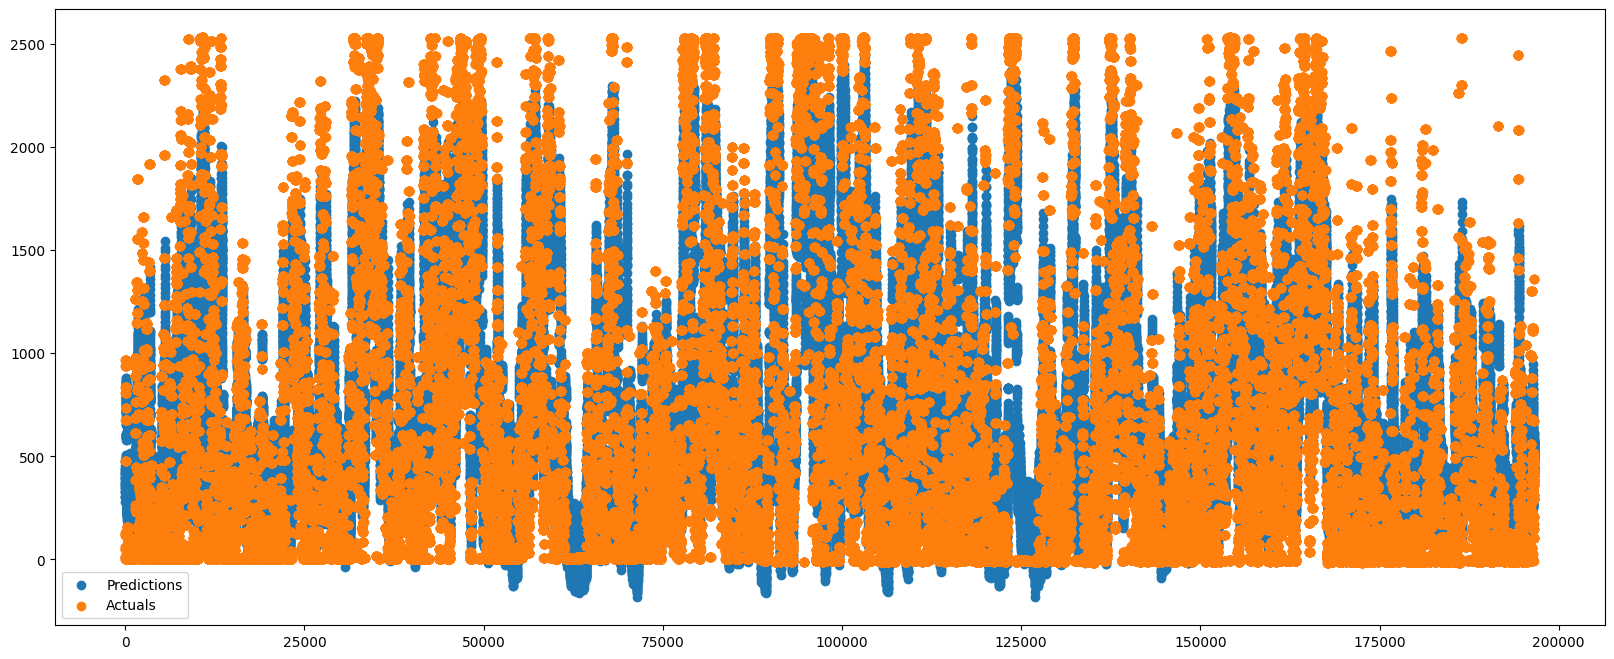

NameError: ignored

In [ ]:
plot_predictions_with_generator(model, test_generator,scaler,4)

In [ ]:
class WindTurbinePipeline:
    def __init__(self, model_weights_path=None, scaler=None):
        self.model_weights_path = model_weights_path
        self.callbacks = self.__get_callbacks()
        self.scaler = scaler
        self.batch_size=4096
        self.input_steps=24
        self.output_steps=12
        self.model = self.__build_complex_seq2seq()

        if self.model_weights_path is not None:
            if self.scaler is None:
                raise "You should define also a scaler together with model"
            self.model.load_weights(model_weights_path)

    def train(self, data, epoch=100):
        df = self.__preprocess(data)
        if self.scaler is None:
            self.scaler = MinMaxScaler(feature_range=(-1, 1))
            self.scaler.fit(df)
        scaled_df = pd.DataFrame(self.scaler.transform(df), columns=df.columns)
        scaled_df.index = df.index

        # Split in test_train
        split_point = int(0.8 * len(scaled_df))
        train = scaled_df.iloc[:split_point]
        test = scaled_df.iloc[split_point:]

        adjusted_train_data = self.TrainingDataGenerator(train, self.input_steps, self.output_steps, self.batch_size)
        adjusted_test_data = self.TrainingDataGenerator(test, self.input_steps, self.output_steps, self.batch_size)

        del df; del scaled_df; del train; del test

        self.model.fit(
            x=adjusted_train_data,
            epochs=epoch,
            validation_data=adjusted_test_data,
            callbacks=self.callbacks
        )
        self.__plot_loss()

        self.model.fit(
            x = adjusted_test_data,
            validation_data = adjusted_test_data,
            epochs = 4
        )


    def predict(self, data ):
        df = self.__preprocess(data)
        scaled_df = pd.DataFrame(self.scaler.transform(df), columns=df.columns)
        scaled_df.index = df.index
        adjusted_data = self.__prepare_data_predict(df, self.input_steps, self.output_steps)
        del df; del scaled_df

        predictions = self.model.predict(adjusted_data).flatten()

        # Create dummy arrays with the same shape as the original data
        dummy_array_pred = np.zeros((len(predictions), self.scaler.scale_.shape[0]))
        active_power_col_index = 2  # Assuming 'Active Power avg' is the 3rd column in the original DataFrame
        dummy_array_pred[:, active_power_col_index] = predictions

        predictions = scaler.inverse_transform(dummy_array_pred)[:, active_power_col_index]

        return predictions



    def __build_complex_seq2seq(self, input_shape=(24, 16), output_shape=(12, 1), n_hidden=16, n_filters=128, kernel_size=2, dropout=0.5, reg_strength=0.0015):
        encoder_inputs = tfkl.Input(shape=input_shape)

        # Smaller kernel size and fewer filters
        conv1d = tfkl.Conv1D(filters=n_filters, kernel_size=kernel_size, activation='relu', padding='same')(encoder_inputs)

        encoder_l1 = tfkl.Bidirectional(tfkl.GRU(n_hidden, return_sequences=True, return_state=True, kernel_regularizer=tf.keras.regularizers.l2(reg_strength)))
        encoder_outputs1, forward_h1, backward_h1 = encoder_l1(conv1d)
        encoder_states1 = [forward_h1, backward_h1]

        # Reduced to one encoder layer for simplicity
        attention = tfkl.Attention(use_scale=True)([encoder_outputs1, encoder_outputs1])
        combined = tfkl.Concatenate(axis=-1)([encoder_outputs1, attention])

        decoder_inputs = tfkl.Input(shape=output_shape)

        decoder_l1 = tfkl.Bidirectional(tfkl.GRU(n_hidden, return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(reg_strength)))
        decoder_outputs1 = decoder_l1(decoder_inputs, initial_state=encoder_states1)

        # Increased dropout rate
        decoder_outputs1 = tfkl.Dropout(dropout)(decoder_outputs1)

        decoder_outputs = tfkl.TimeDistributed(tfkl.Dense(output_shape[1]))(decoder_outputs1)

        model = tfk.Model(inputs=[encoder_inputs, decoder_inputs], outputs=decoder_outputs)
        model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.Adam(), metrics=['mae'])

        return model

    def __get_callbacks(self):
        model_checkpoint_callback = ModelCheckpoint(
            filepath=self.model_weights_path,
            save_weights_only=True,
            monitor='val_loss',
            mode='min',
            save_best_only=True
        )

        lr_reducer = ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=2,
            verbose=1,
            min_lr=1e-5)

        early_stopping_callback = EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True,
            verbose=1)

        return [model_checkpoint_callback, lr_reducer, early_stopping_callback]

    def __preprocess(self, df):
        # Make a copy of the input DataFrame
        df = df.copy()

        # Combine 'Datum (Anlage)' and 'Zeit (Anlage)' columns into a single 'DateTime' column and drop the original columns
        df['DateTime'] = pd.to_datetime(df['Datum (Anlage)'] + ' ' + df['Zeit (Anlage)'],
                                        format='%d.%m.%y %H:%M:%S')
        df.drop(columns=['Datum (Anlage)', 'Zeit (Anlage)'], inplace=True)

        # Reducing dimention for the Dataset
        df = df[::3]

        df.set_index('DateTime', inplace=True)

        # Define a list of columns with missing data exceeding 25%
        missing_values_columns = ['Ereignis', 'Error Number', 'Wind Speed (max)', 'Wind Speed (min)',
                                  'Rotor Speed [rpm] (max)', 'Rotor Speed [rpm] (min)',
                                  'Active Power (max)', 'Active Power (min)', 'Wind Direction (avg)',
                                  'Feature 0', 'Feature 5', 'Feature 6', 'Feature 8', 'Feature 9',
                                  'Feature 10', 'Feature 11', 'Feature 13', 'Feature 14', 'Feature 15',
                                  'Feature 19', 'Feature 20', 'Feature 21', 'Feature 22', 'Feature 23',
                                  'Feature 24', 'Feature 25', 'Feature 26', 'Feature 27', 'Feature 29',
                                  'Feature 30', 'Feature 31', 'Feature 32', 'Feature 33', 'Feature 34',
                                  'Feature 35', 'Feature 36', 'Feature 37', 'Feature 38', 'Feature 39',
                                  'Feature 40', 'Feature 41', 'Feature 42', 'Feature 43', 'Feature 44',
                                  'Feature 45', 'Feature 46', 'Feature 47', 'Feature 48', 'Feature 49',
                                  'Feature 50', 'Feature 51', 'Feature 52', 'Feature 53', 'Feature 54',
                                  'Feature 55', 'Feature 56', 'Feature 57', 'Feature 58', 'Feature 59',
                                  'Feature 60', 'Feature 61', 'Feature 62', 'Feature 63', 'Feature 64',
                                  'Feature 65', 'Feature 66', 'Feature 67', 'Feature 68', 'Feature 69',
                                  'Feature 70', 'Feature 71', 'Feature 72', 'Feature 73', 'Feature 74',
                                  'Feature 75', 'Feature 76', 'Feature 77', 'Feature 78', 'Feature 79',
                                  'Feature 80', 'Feature 81', 'Feature 82']

        # Drop columns with missing data exceeding 25%
        df = df.drop(missing_values_columns, axis=1)

        # Replace commas with dots in all columns
        df = df.applymap(lambda x: x.replace(',', '.') if isinstance(x, str) else x)

        # Remove non-numeric characters from all columns
        df = df.applymap(lambda x: self.remove_non_numeric(x) if isinstance(x, str) else x)

        # Convert all columns (except the last one) to float
        df.iloc[:, :] = df.iloc[:, :].astype(float)

        # Drop columns with high correlation
        df.drop(columns=["Generator Speed [rpm] (avg)",
                         "Feature 16", "Feature 17",
                         "Feature 2", "Feature 18", "Feature 4",
                         "Reactive Power (avg)",
                         ], axis=1, inplace=True)

        # Drop rows with missing data in the 'Wind Speed (avg)' column
        df.dropna(subset=["Wind Speed (avg)"], inplace=True)

        # Forward-fill missing data
        df.fillna(method="ffill", inplace=True)

        df = df.sort_values(by='DateTime', ascending=True)

        hour = 60 * 60
        minute = 60
        day = 60 * 60 * 24
        year = 365.2425 * day

        df['Seconds'] = df.index.map(pd.Timestamp.timestamp)

        df['Day sin'] = np.sin(df['Seconds'] * (2 * np.pi / day))
        df['Day cos'] = np.cos(df['Seconds'] * (2 * np.pi / day))
        df['Year sin'] = np.sin(df['Seconds'] * (2 * np.pi / year))
        df['Year cos'] = np.cos(df['Seconds'] * (2 * np.pi / year))
        df['hour sin'] = np.sin(df['Seconds'] * (2 * np.pi / hour))
        df['hour cos'] = np.cos(df['Seconds'] * (2 * np.pi / hour))
        df['minute sin'] = np.sin(df['Seconds'] * (2 * np.pi / minute))
        df['minute cos'] = np.cos(df['Seconds'] * (2 * np.pi / minute))
        df = df.drop('Seconds', axis=1)

        df.columns = [self.remove_non_characters(i) for i in df.columns]

        return df

    def remove_non_numeric(self, text):
        new_value = ''.join(filter(lambda x: x.isdigit() or x == '.', text))

        return new_value if new_value is not '' else np.nan

    def remove_non_characters(self, text):
        # Using a generator expression and join to filter out non-character elements
        return ''.join(char for char in text if char.isalpha() or (char == " " or char.isdigit()))

    def __plot_loss(self):
        plt.plot(self.model.history['loss'], label='Training Loss')
        plt.plot(self.model.history['val_loss'], label='Validation Loss')
        plt.title('Model Loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(loc='upper right')
        plt.show()


    class TrainingDataGenerator(Sequence):
        """Adjust the shape of data for the model"""
        def __init__(self, df, input_steps, output_steps, batch_size):
            self.df = df
            self.input_steps = input_steps
            self.output_steps = output_steps
            self.batch_size = batch_size
            self.indexes = np.arange(len(df) - (input_steps + output_steps) + 1)

        def __len__(self):
            return len(self.indexes) // self.batch_size

        def __getitem__(self, index):
            start = index * self.batch_size
            end = (index + 1) * self.batch_size
            batch_x, batch_y, decoder_input = [], [], []
            for i in range(start, end):
                x = self.df.iloc[i:i + self.input_steps].values
                y = self.df.iloc[i + self.input_steps:i + self.input_steps + self.output_steps][
                    ['Active Power avg']].values
                decoder_inp = np.zeros(
                    (self.output_steps, 1))  # assuming you want decoder_input to have the shape (output_steps, 1)
                batch_x.append(x)
                batch_y.append(y)
                decoder_input.append(decoder_inp)
            return [np.array(batch_x), np.array(decoder_input)], np.array(batch_y)


    def __prepare_data_predict(self, df, input_steps, output_steps):
        x = df.iloc[-input_steps:].values
        x = np.expand_dims(x, axis=0)  # Expanding dimensions to account for batch size

        decoder_inp = np.zeros((1, output_steps, 1))  # Making this batch-like and compatible with model

        return [x, decoder_inp]


<>:207: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:207: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-71-80bd4c700fd1>:207: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  return new_value if new_value is not '' else np.nan


In [ ]:
a = WindTurbinePipeline(checkpoint_filepath, scaler)

In [ ]:
a.train(df)

<ipython-input-71-80bd4c700fd1>:166: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, :] = df.iloc[:, :].astype(float)


Epoch 1/100
 6/23 [======>.......................] - ETA: 30s - loss: 0.1729 - mae: 0.3119

KeyboardInterrupt: ignored

In [ ]:
df.iloc[-15:, 3:]

,Error Number,Wind Speed (avg),Wind Speed (max),Wind Speed (min),Rotor Speed [rpm] (avg),Rotor Speed [rpm] (max),Rotor Speed [rpm] (min),Active Power (avg),Active Power (max),Active Power (min),...,Feature 73,Feature 74,Feature 75,Feature 76,Feature 77,Feature 78,Feature 79,Feature 80,Feature 81,Feature 82
52402,NaN,"6,67",NaN,NaN,"10,81",NaN,NaN,972.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
52403,NaN,"6,13",NaN,NaN,"10,04",NaN,NaN,773.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
52404,NaN,"5,82",NaN,NaN,"9,75",NaN,NaN,703.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
52405,NaN,"6,32",NaN,NaN,"10,53",NaN,NaN,898.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
52406,NaN,"5,96",NaN,NaN,"9,70",NaN,NaN,700.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
52407,NaN,"5,22",NaN,NaN,"8,66",NaN,NaN,485.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
52408,NaN,"5,27",NaN,NaN,"8,35",NaN,NaN,431.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
52409,NaN,"5,29",NaN,NaN,"8,62",NaN,NaN,476.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
52410,NaN,"5,52",NaN,NaN,"9,09",NaN,NaN,563.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
52411,NaN,"5,32",NaN,NaN,"9,30",NaN,NaN,607.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [ ]:
# Define a function to remove non-numeric characters (except ".") from a string
def remove_non_numeric(text):
    new_value =  ''.join(filter(lambda x: x.isdigit() or x == '.', text))

    return new_value if new_value is not '' else np.nan

def remove_non_characters(s):
    # Using a generator expression and join to filter out non-character elements
    return ''.join(char for char in s if char.isalpha() or (char == " " or char.isdigit()))





### Using Tuner

In [ ]:
!pip install keras-tuner
from kerastuner import RandomSearch, HyperParameters
import tensorflow as tf
from tensorflow.keras import layers as tfkl
from tensorflow.keras import models as tfk

def build_model(hp):
    input_shape = (48, 16)
    output_shape = (24, 1)
    n_hidden = hp.Int('n_hidden', min_value=32, max_value=512, step=32)
    n_filters = hp.Int('n_filters', min_value=32, max_value=128, step=32)
    kernel_size = hp.Choice('kernel_size', values=[3, 5, 7])
    dropout_rate = hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1)
    reg_strength = hp.Float('reg_strength', min_value=1e-5, max_value=1e-2, sampling='LOG')

    encoder_inputs = tfkl.Input(shape=input_shape)
    conv1d = tfkl.Conv1D(filters=n_filters, kernel_size=kernel_size, activation='relu', padding='same')(encoder_inputs)

    encoder_l1 = tfkl.Bidirectional(tfkl.GRU(n_hidden, return_sequences=True, return_state=True, kernel_regularizer=tf.keras.regularizers.l2(reg_strength)))
    encoder_outputs1, forward_h1, backward_h1 = encoder_l1(conv1d)
    encoder_states1 = [forward_h1, backward_h1]

    encoder_l2 = tfkl.Bidirectional(tfkl.GRU(n_hidden, return_sequences=True, return_state=True, kernel_regularizer=tf.keras.regularizers.l2(reg_strength)))
    encoder_outputs2, forward_h2, backward_h2 = encoder_l2(encoder_outputs1)
    encoder_states2 = [forward_h2, backward_h2]

    encoder_l3 = tfkl.Bidirectional(tfkl.GRU(n_hidden, return_sequences=True, return_state=True, kernel_regularizer=tf.keras.regularizers.l2(reg_strength)))
    encoder_outputs3, forward_h3, backward_h3 = encoder_l3(encoder_outputs2)
    encoder_states3 = [forward_h3, backward_h3]

    attention = tfkl.Attention(use_scale=True)([encoder_outputs3, encoder_outputs3])
    combined = tfkl.Concatenate(axis=-1)([encoder_outputs3, attention])

    decoder_inputs = tfkl.Input(shape=output_shape)
    decoder_l1 = tfkl.Bidirectional(tfkl.GRU(n_hidden, return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(reg_strength)))
    decoder_outputs1 = decoder_l1(decoder_inputs, initial_state=encoder_states1)

    decoder_l2 = tfkl.Bidirectional(tfkl.GRU(n_hidden, return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(reg_strength)))
    decoder_outputs2 = decoder_l2(decoder_outputs1, initial_state=encoder_states2)

    decoder_l3 = tfkl.Bidirectional(tfkl.GRU(n_hidden, return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(reg_strength)))
    decoder_outputs3 = decoder_l3(decoder_outputs2, initial_state=encoder_states3)

    decoder_outputs3 = tfkl.Dropout(dropout_rate)(decoder_outputs3)
    decoder_outputs = tfkl.TimeDistributed(tfkl.Dense(output_shape[1]))(decoder_outputs3)

    model = tfk.Model(inputs=[encoder_inputs, decoder_inputs], outputs=decoder_outputs)
    model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')), metrics=['mae'])
    return model


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.1/127.1 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 13.2 MB/s eta 0:00:00
Using TensorFlow backend


<ipython-input-26-7bd51580a464>:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch, HyperParameters


In [ ]:
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=30,
    executions_per_trial=2,  # It is often helpful to run each trial multiple times and average the results to get more accurate readings.
    directory='/content/drive/MyDrive/Profesional/SmartData Tech Task/models/seq2seq/tuner',
    project_name='my_project'
)

tuner.search(
    x = train_generator,
    #batch_size = batch_size,
    epochs = 20,
    validation_data=test_generator,
    callbacks=[lr_reducer, early_stopping_callback]
)

# Retrieve the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Or you can just retrieve the best hyperparameters and use them to build the model
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]



Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
256               |256               |n_hidden
128               |128               |n_filters
3                 |3                 |kernel_size
0.2               |0.2               |dropout_rate
3.688e-05         |3.688e-05         |reg_strength
0.00079536        |0.00079536        |learning_rate

Epoch 1/20
1522/1522 [==============================] - 172s 91ms/step - loss: 0.2109 - mae: 0.3072 - val_loss: 0.1670 - val_mae: 0.3189 - lr: 7.9536e-04
Epoch 2/20
1522/1522 [==============================] - 134s 88ms/step - loss: 0.1625 - mae: 0.2861 - val_loss: 0.1330 - val_mae: 0.2542 - lr: 7.9536e-04
Epoch 3/20
1522/1522 [==============================] - 131s 86ms/step - loss: 0.1538 - mae: 0.2803 - val_loss: 0.1326 - val_mae: 0.2471 - lr: 7.9536e-04
Epoch 4/20
1522/1522 [==============================] - 139s 92ms/step - loss: 0.1534 - mae: 0.2796 - val_loss: 0.1305 - val_mae: 0.2589 - lr: 7.9536e-04
Epoc

### Plot training

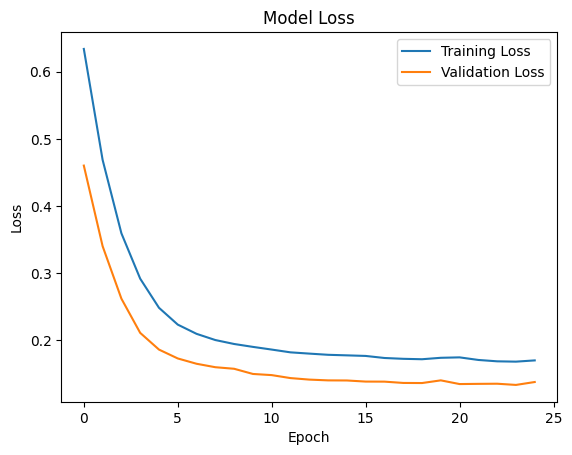

In [ ]:
import matplotlib.pyplot as plt

# Assuming `history` is the returned value from model.fit()
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [ ]:
X.iloc[-5:]

,Wind Speed avg,Rotor Speed rpm avg,Active Power avg,Nacelle Position avg,Feature 1,Feature 3,Feature 7,Feature 28,Day sin,Day cos,Year sin,Year cos,hour sin,hour cos,minute sin,minute cos
DateTime,,,,,,,,,,,,,,,,
2021-12-30 21:50:00,-0.327158,0.992019,0.841530,0.683333,-0.531008,0.464325,-0.156374,0.997206,-0.537300,0.843391,-0.012046,0.999927,-1.0,0.5,-0.721595,-1.0
2021-12-30 22:20:00,-0.379770,0.915403,0.595628,0.694444,-0.531561,0.283764,-0.159126,0.995609,-0.422618,0.906308,-0.011688,0.999932,1.0,-0.5,-0.711616,-1.0
2021-12-30 22:50:00,-0.376806,0.912211,0.583919,0.677778,-0.533223,0.273207,-0.170824,0.996008,-0.300706,0.953717,-0.011330,0.999936,-1.0,0.5,-0.701637,-1.0
2021-12-30 23:20:00,-0.313079,0.920192,0.881343,0.672222,-0.540421,0.347652,-0.178049,0.996008,-0.173648,0.984808,-0.010971,0.999940,1.0,-0.5,-0.691658,-1.0


### Trying different Settings

In [ ]:
batch_size = 8192

# Define the split point
split_point = int(0.8 * len(X))  # 80% for training and 20% for testing

# Split the dataset
train = X.iloc[:split_point]
test = X.iloc[split_point:]


# Create Data Generators
train_generator = DataGenerator(train, input_steps, output_steps, batch_size=batch_size)
test_generator = DataGenerator(test, input_steps, output_steps, batch_size=batch_size)

In [ ]:
import tensorflow as tf

In [ ]:
tfk = tf.keras
tfkl = tf.keras.layers

In [ ]:
input_shape = (input_steps, X.shape[1])
output_shape = (output_steps, len(X.columns))

In [ ]:
def build_seq2seq(input_shape=(24, 16), output_shape=(12, 1), n_hidden=16, n_filters=128, kernel_size=2, dropout=0.5, reg_strength=0.0015):
    encoder_inputs = tfkl.Input(shape=input_shape)

    # Smaller kernel size and fewer filters
    conv1d = tfkl.Conv1D(filters=n_filters, kernel_size=kernel_size, activation='relu', padding='same')(encoder_inputs)

    encoder_l1 = tfkl.Bidirectional(tfkl.GRU(n_hidden, return_sequences=True, return_state=True, kernel_regularizer=tf.keras.regularizers.l2(reg_strength)))
    encoder_outputs1, forward_h1, backward_h1 = encoder_l1(conv1d)
    encoder_states1 = [forward_h1, backward_h1]

    # Reduced to one encoder layer for simplicity
    attention = tfkl.Attention(use_scale=True)([encoder_outputs1, encoder_outputs1])
    combined = tfkl.Concatenate(axis=-1)([encoder_outputs1, attention])

    decoder_inputs = tfkl.Input(shape=output_shape)

    decoder_l1 = tfkl.Bidirectional(tfkl.GRU(n_hidden, return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(reg_strength)))
    decoder_outputs1 = decoder_l1(decoder_inputs, initial_state=encoder_states1)

    # Increased dropout rate
    decoder_outputs1 = tfkl.Dropout(dropout)(decoder_outputs1)

    decoder_outputs = tfkl.TimeDistributed(tfkl.Dense(output_shape[1]))(decoder_outputs1)

    model = tfk.Model(inputs=[encoder_inputs, decoder_inputs], outputs=decoder_outputs)
    model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.Adam(), metrics=['mae'])

    return model

In [ ]:
model = build_seq2seq()
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 24, 16)]             0         []                            
                                                                                                  
 conv1d_2 (Conv1D)           (None, 24, 128)              4224      ['input_5[0][0]']             
                                                                                                  
 input_6 (InputLayer)        [(None, 12, 1)]              0         []                            
                                                                                                  
 bidirectional_4 (Bidirecti  [(None, 24, 32),             14016     ['conv1d_2[0][0]']            
 onal)                        (None, 16),                                                   

In [ ]:
checkpoint_filepath = "/content/drive/MyDrive/Profesional/SmartData Tech Task/models/seq2seq/aiesec/model_4096batch.keras"

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

# Define Learning Rate Reducer callback
lr_reducer = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    verbose=1,
    min_lr=1e-5)

# Define Early Stopping callback
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1)

callbacks = [model_checkpoint_callback, lr_reducer, early_stopping_callback]

In [ ]:
history = model.fit(
    x = train_generator,
    #batch_size = batch_size,
    epochs = 25,
    validation_data=test_generator,
    callbacks = callbacks
).history

# model.fit(
#     x = test,
#     #batch_size = batch_size,
#     validation_data = test,
#     epochs = 2
# )

Epoch 1/25
23/23 [==============================] - 147s 4s/step - loss: 0.6340 - mae: 0.5882 - val_loss: 0.4601 - val_mae: 0.4501 - lr: 0.0010
Epoch 2/25
23/23 [==============================] - 84s 4s/step - loss: 0.4687 - mae: 0.4709 - val_loss: 0.3401 - val_mae: 0.3827 - lr: 0.0010
Epoch 3/25
23/23 [==============================] - 84s 4s/step - loss: 0.3593 - mae: 0.3999 - val_loss: 0.2619 - val_mae: 0.3149 - lr: 0.0010
Epoch 4/25
23/23 [==============================] - 91s 4s/step - loss: 0.2917 - mae: 0.3581 - val_loss: 0.2109 - val_mae: 0.2699 - lr: 0.0010
Epoch 5/25
23/23 [==============================] - 85s 4s/step - loss: 0.2483 - mae: 0.3339 - val_loss: 0.1860 - val_mae: 0.2626 - lr: 0.0010
Epoch 6/25
23/23 [==============================] - 86s 4s/step - loss: 0.2232 - mae: 0.3217 - val_loss: 0.1728 - val_mae: 0.2632 - lr: 0.0010
Epoch 7/25
23/23 [==============================] - 84s 4s/step - loss: 0.2094 - mae: 0.3167 - val_loss: 0.1649 - val_mae: 0.2706 - lr: 0.001

In [ ]:
model.load_weights(checkpoint_filepath)

## Predict

In [ ]:
def plot_predictions_with_generator(model, generator,scaler, num_batches=None):
    all_predictions = []
    all_actuals = []

    if num_batches is None:
        num_batches = len(generator)

    for i in range(num_batches):
        (batch_x, decoder_input), batch_y = generator[i]
        predictions = model.predict([batch_x, decoder_input])
        all_predictions.extend(predictions.flatten())
        all_actuals.extend(batch_y.flatten())

    all_predictions = np.array(all_predictions)
    all_actuals = np.array(all_actuals)

    # Create dummy arrays with the same shape as the original data
    dummy_array_pred = np.zeros((len(all_predictions), scaler.scale_.shape[0]))
    dummy_array_actual = np.zeros((len(all_actuals), scaler.scale_.shape[0]))

    # Place the predictions and actuals in the column corresponding to 'Active Power avg'
    active_power_col_index = 2  # Assuming 'Active Power avg' is the 3rd column in the original DataFrame
    dummy_array_pred[:, active_power_col_index] = all_predictions
    dummy_array_actual[:, active_power_col_index] = all_actuals

    # Inverse transform using the original scaler
    all_predictions = scaler.inverse_transform(dummy_array_pred)[:, active_power_col_index]
    all_actuals = scaler.inverse_transform(dummy_array_actual)[:, active_power_col_index]


    df = pd.DataFrame(data={'Predictions': all_predictions, 'Actuals': all_actuals})

    plt.figure(figsize=(20, 8))
    plt.scatter(range(len(df)),df['Predictions'], label='Predictions')
    plt.scatter(range(len(df)),df['Actuals'], label='Actuals')
    plt.legend()
    plt.show()


128/128 [==============================] - 0s 4ms/step


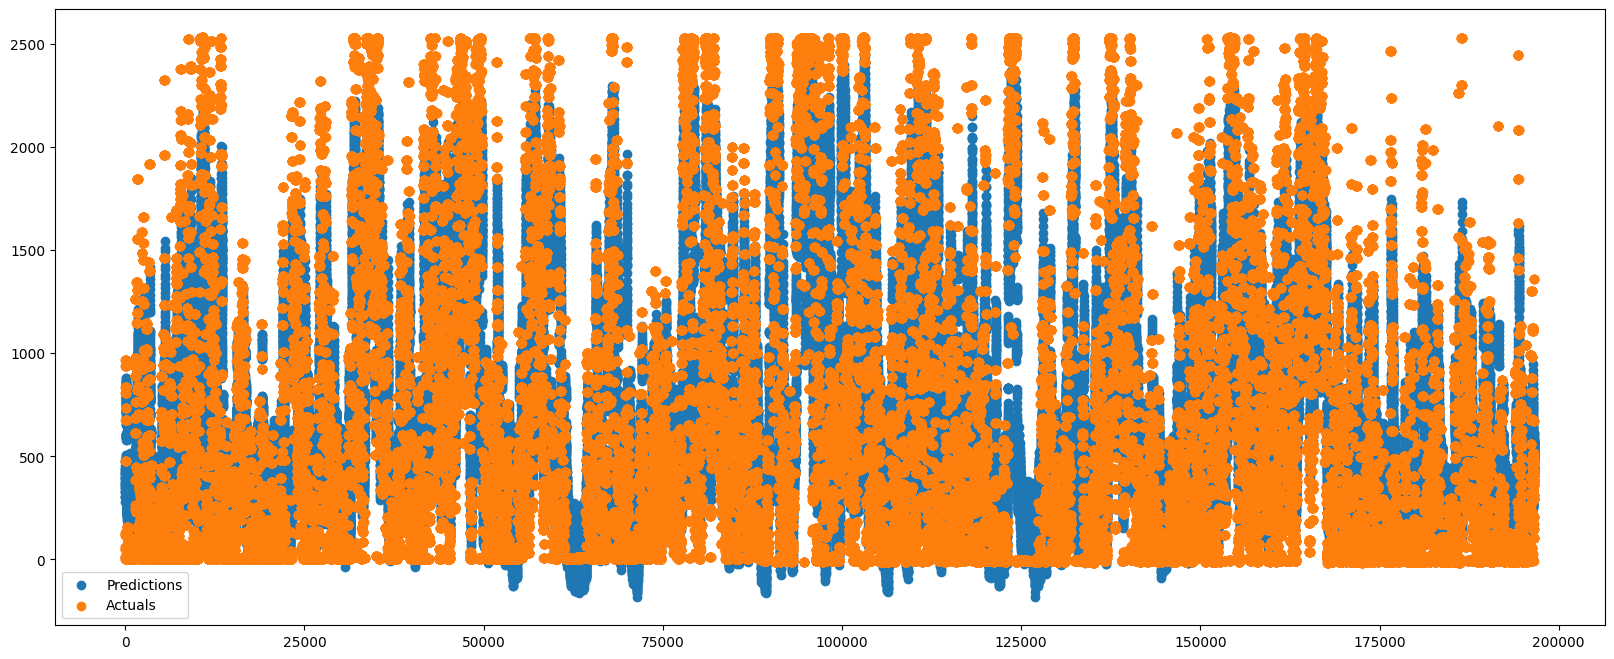

NameError: ignored

In [ ]:
plot_predictions_with_generator(model, test_generator,scaler,4)